In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


path = "../data/Projected_impacts_datasheet_11.16.2021.xlsx"
df = pd.read_excel(path, engine='openpyxl')

In [2]:
df

,ID,Ref No,Methods,Scale,Crop,Country,Site(location),Region,latitude,longitude,...,Note2 \n(* = Local temperature is estimated ),Note3 \n(* = Local delta Pr is estimated ),Note4 \n(* = Global temperature is estimated ),Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period),Projected precipitation (mm),Estimated precipitation change from 2005 (mm),Estimated precipitation (mm)
0,1,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.41670,73.091100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.634913,516.47927
1,2,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.41670,73.091100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.692129,516.47927
2,3,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.27050,-104.108000,...,*,*,NaN,NaN,NaN,NaN,NaN,NaN,21.533687,NaN
3,4,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.27050,-104.108000,...,*,*,NaN,NaN,NaN,NaN,NaN,NaN,24.125429,NaN
4,5,3,SCOPUS-NewSearch,Regional,Maize,China,Hubei,Asia,30.00000,110.000000,...,NaN,*,NaN,48.715,NaN,NaN,NaN,NaN,51.857080,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8699,200,Aggarwal-DB,Regional(Site-based),Wheat,Finland,NaN,Europe,61.92411,25.748151,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,47.905867,NaN
8699,8700,200,Aggarwal-DB,Regional(Site-based),Wheat,Finland,NaN,Europe,61.92411,25.748151,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,32.933834,NaN
8700,8701,201,Aggarwal-DB,Regional,Wheat,Canada,Saskatchewan,North America,56.13040,-106.347000,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,25.773843,NaN
8701,8702,202,Aggarwal-DB,Regional (Site-based),Wheat,India,NaN,Asia,20.59370,78.962900,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,26.774410,NaN


In [3]:
df[df["Region"] == "Africa"]["Country"].unique()

array(['Benin', 'Senegal', 'Ghana', 'Sudan Savanna', 'Egypt', 'Ethiopia',
       'Kenya', 'Malawi', 'Nigeria', 'South Africa', 'Tanzania', 'Uganda',
       'Burkina Faso', 'Gambia', 'Guinea', 'Guinea Bissau',
       "Cote D'lvoire", 'Mali', 'Niger', 'Sierra Leone', 'Togo',
       'Mozambique', 'Cameroon', 'Botswana', 'Mauritania', 'Madagascar',
       'Rwanda', 'Zambia', 'Sudan', 'Morocco', 'Algeria', 'Syria'],
      dtype=object)

In [4]:
Northern = [
    "Algeria",
    "Egypt",
    "Libya",
    "Morocco",
    "Sudan",
    "Tunisia",
    "Western Sahara",
    "Syria",
]

Eastern = [
    "British Indian Ocean Territory",
    "Burundi",
    "Comoros",
    "Djibouti",
    "Eritrea",
    "Ethiopia",
    "French Southern Territories",
    "Kenya",
    "Madagascar",
    "Malawi",
    "Mauritius",
    "Mayotte",
    "Mozambique",
    "Réunion",
    "Rwanda",
    "Seychelles",
    "Somalia",
    "South Sudan",
    "Uganda",
    "United Republic of Tanzania",
    "Zambia",
    "Zimbabwe",
    "Tanzania",
]

Middle = [
    "Angola",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Congo",
    "Democratic Republic of the Congo",
    "Equatorial Guinea",
    "Gabon",
    "Sao Tome and Principe",
]

Southern = [
    "Botswana",
    "Eswatini",
    "Lesotho",
    "Namibia",
    "South Africa",
]

Western = [
    "Benin",
    "Burkina Faso",
    "Cabo Verde",
    "cote d'lvoire",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Liberia",
    "Mali",
    "Mauritania",
    "Niger",
    "Nigeria",
    "Saint Helena, Ascension and Tristan da Cunha",
    "Saint Helena",
    "Ascension Island",
    "Tristan da Cunha",
    "Senegal",
    "Sierra Leone",
    "Togo",
    "Sudan Savanna",
    "guinea bissau"
]

AfricaUN = {
    "Northern": Northern,
    "Eastern": Eastern,
    "Middle": Middle,
    "Southern": Southern,
    "Western": Western,
}

country_to_region = {}
for region, countries in AfricaUN.items():
    for country in countries:
        country_to_region[country.lower().strip()] = region

df[df["Region"] == "Africa"]["Country"].map(lambda x: country_to_region[x.lower().strip()])

60       Western
61       Western
62       Western
63       Western
64       Western
          ...   
8611    Northern
8612    Northern
8613    Northern
8614    Northern
8615    Northern
Name: Country, Length: 1313, dtype: object

In [5]:
from collections import defaultdict
region_to_countries = defaultdict(list)
for region, countries in country_to_region.items():
    region_to_countries[countries].append(region)
dict(region_to_countries)

{'Northern': ['algeria',
  'egypt',
  'libya',
  'morocco',
  'sudan',
  'tunisia',
  'western sahara',
  'syria'],
 'Eastern': ['british indian ocean territory',
  'burundi',
  'comoros',
  'djibouti',
  'eritrea',
  'ethiopia',
  'french southern territories',
  'kenya',
  'madagascar',
  'malawi',
  'mauritius',
  'mayotte',
  'mozambique',
  'réunion',
  'rwanda',
  'seychelles',
  'somalia',
  'south sudan',
  'uganda',
  'united republic of tanzania',
  'zambia',
  'zimbabwe',
  'tanzania'],
 'Middle': ['angola',
  'cameroon',
  'central african republic',
  'chad',
  'congo',
  'democratic republic of the congo',
  'equatorial guinea',
  'gabon',
  'sao tome and principe'],
 'Southern': ['botswana', 'eswatini', 'lesotho', 'namibia', 'south africa'],
 'Western': ['benin',
  'burkina faso',
  'cabo verde',
  "cote d'lvoire",
  'gambia',
  'ghana',
  'guinea',
  'guinea-bissau',
  'liberia',
  'mali',
  'mauritania',
  'niger',
  'nigeria',
  'saint helena, ascension and tristan da

/tmp/ipykernel_11411/2656225548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_impact_data.dropna(subset=['Country', 'Region', 'Climate impacts relative to 2005'], inplace=True)


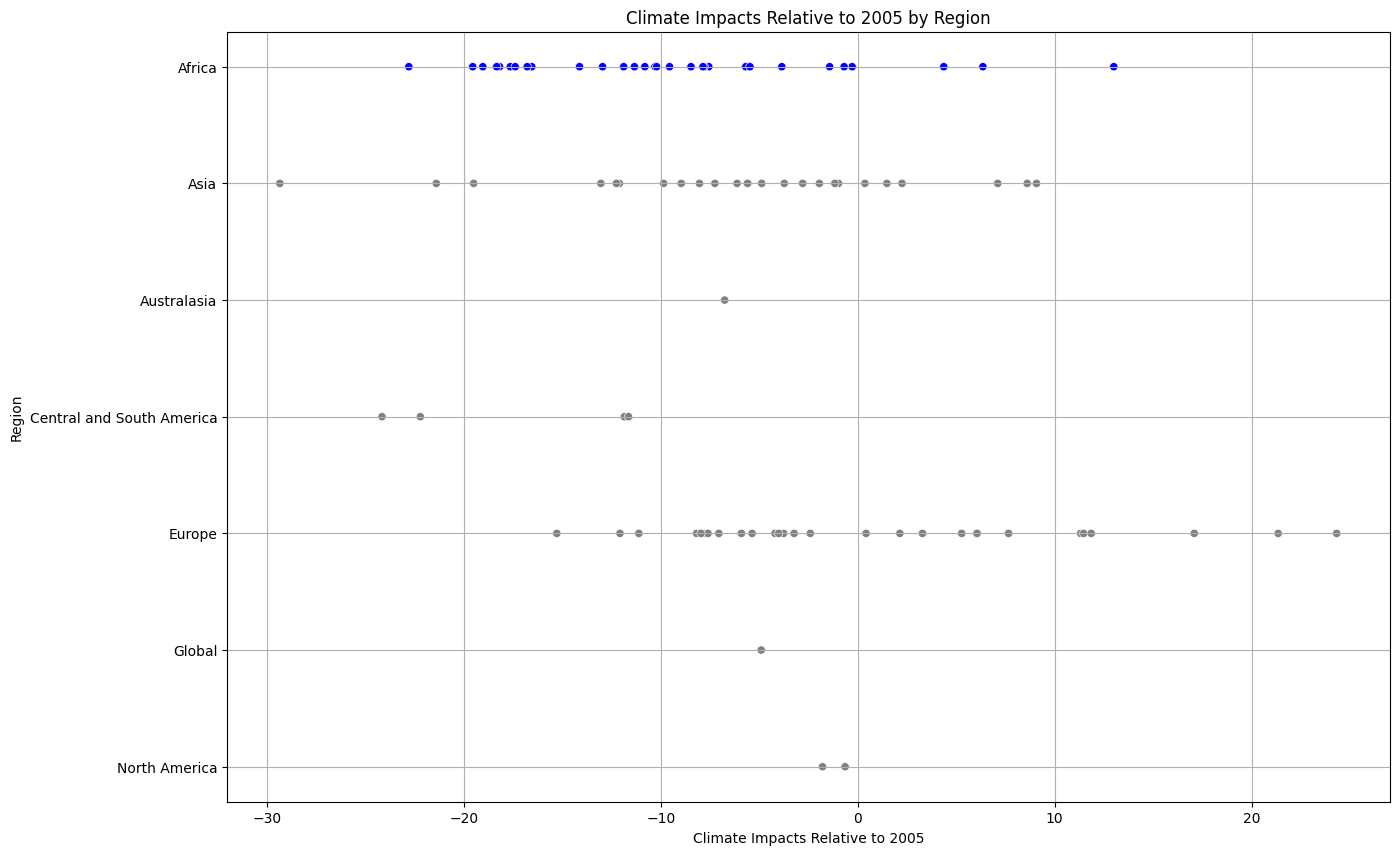

In [6]:
# Filter the dataset to include only the relevant columns with the new column of interest
climate_impact_data = df[['Country', 'Region', 'Climate impacts relative to 2005']]

# Drop rows with missing values in the relevant columns
climate_impact_data.dropna(subset=['Country', 'Region', 'Climate impacts relative to 2005'], inplace=True)

# Grouping by Region and Country
grouped_climate_impact_data = climate_impact_data.groupby(['Region', 'Country']).mean().reset_index()

# Creating a new color column for the climate impact data
grouped_climate_impact_data['SimpleColor'] = grouped_climate_impact_data['Region'].apply(lambda x: 'blue' if x == 'Africa' else 'gray')

# Creating the barcode plot for climate impacts
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Climate impacts relative to 2005', y='Region', data=grouped_climate_impact_data, hue='SimpleColor', palette=['blue', 'gray'], legend=False)
plt.title('Climate Impacts Relative to 2005 by Region')
plt.xlabel('Climate Impacts Relative to 2005')
plt.ylabel('Region')
plt.grid(True)
plt.show()

In [7]:
df.to_csv("Projected_impacts_datasheet_11.16.2021.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 55 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                8703 non-null   int64  
 1   Ref No                                                            8703 non-null   object 
 2    Methods                                                          8703 non-null   object 
 3   Scale                                                             8703 non-null   object 
 4   Crop                                                              8703 non-null   object 
 5   Country                                                           8703 non-null   object 
 6   Site(location)                                                    2694 non-null   object 
 7   Region                           

In [9]:
df.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T,...,Climate impacts per decade (%),CO2 ppm,Publication year,Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period),Projected precipitation (mm),Estimated precipitation change from 2005 (mm),Estimated precipitation (mm)
count,8703.00000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8703.000000,8702.000000,4392.000000,...,8703.000000,8538.000000,8703.000000,386.000000,1917.000000,366.000000,189.000000,2.000000,8666.000000,3229.000000
mean,4352.00000,25.185816,32.340434,17.804514,17.252870,974.121895,962.207224,2055.435482,1986.571248,2.095515,...,-1.576233,514.895029,2014.038837,50.695555,862.841427,4.425903,668.146545,775.920000,29.189091,1000.694682
std,2512.48403,22.770279,69.821017,7.111171,8.282561,538.116430,693.195670,22.553559,13.148001,1.207587,...,5.253247,114.081462,5.256125,157.213514,577.562989,7.624984,397.076905,38.127198,68.199181,644.096054
min,1.00000,-38.416100,-122.000000,-8.371055,-8.371055,0.967242,0.967242,2000.000000,1965.000000,0.180000,...,-40.777778,330.000000,1984.000000,-335.800000,42.700000,-22.463600,154.000000,748.960000,-411.989780,1.184871
25%,2176.50000,14.058300,2.213750,11.848694,11.119357,605.289909,421.181280,2030.000000,1975.000000,1.127000,...,-2.678499,431.450000,2014.000000,-6.396000,467.000000,0.600000,381.000000,762.440000,-6.691920,502.568983
50%,4352.00000,32.403950,34.888800,17.663128,17.087790,907.985051,839.157841,2055.000000,1975.000000,1.807000,...,-0.701507,486.535320,2014.000000,4.195100,675.000000,4.790000,525.316500,775.920000,18.100457,853.602952
75%,6527.50000,40.339900,90.356300,24.380180,24.863827,1264.254206,1254.342238,2080.000000,2002.000000,2.800000,...,0.743806,550.500000,2017.000000,53.153200,1314.000000,7.000000,815.000000,789.400000,52.009594,1460.800072
max,8703.00000,61.924110,151.750000,30.500914,30.500914,3248.452253,3891.503190,2110.000000,2016.000000,6.600000,...,26.153333,935.874370,2020.000000,791.000000,3300.000000,25.333333,1803.000000,802.880000,824.181388,2905.217349


In [10]:
df["Crop"]

0       Maize
1       Maize
2       Maize
3       Maize
4       Maize
        ...  
8698    Wheat
8699    Wheat
8700    Wheat
8701    Wheat
8702    Wheat
Name: Crop, Length: 8703, dtype: object

# Zoom-in

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import IPython.display as ipd
import pyreadr


result = pyreadr.read_r("../data/results_ssp370_mpi_maize.rds")
ssp370 = result["results_ssp370_mpi_maize"]

result = pyreadr.read_r("../data/results_ssp585_mpi_maize.rds")
ssp585 = result["results_ssp585_mpi_maize"]

df = pd.concat([ssp370, ssp585])
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = gpd.GeoDataFrame(df, geometry=geometry).set_crs("EPSG:4326")

ipd.display(df.head())
df.info()

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70,geometry
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788,POINT (-16.37565 12.79198)
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209,POINT (-16.37565 12.79198)
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572,POINT (-16.37565 12.79198)
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285,POINT (-16.37565 12.79198)
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600,POINT (-16.37565 12.79198)


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   station_id            547453 non-null  object  
 1   crop                  547453 non-null  object  
 2   cycle                 547453 non-null  object  
 3   system                547453 non-null  object  
 4   cultivar              547453 non-null  object  
 5   ssp                   547453 non-null  object  
 6   gcm                   547453 non-null  object  
 7   horizon               541646 non-null  float64 
 8   planting_date         547453 non-null  object  
 9   lat                   547453 non-null  float64 
 10  lon                   547453 non-null  float64 
 11  elev                  547453 non-null  float64 
 12  flowering_date        547453 non-null  object  
 13  maturity_date         547453 non-null  object  
 14  planting_to_maturity  547453 non-

1. Average yield_rfd, yield_irr accross individual years for each combination of  crop, station_id, cycle, cultivar, ssp, gcm, horizon

In [3]:
result = pyreadr.read_r("../data/cultivar.rds")
cult_df = result["cultivar"]
cult_df.head()

,station_id,CTT_maize
rownames,,
1,1.0,1708.982394
2,1.0,1708.982394
3,2.0,1573.740415
4,2.0,1573.740415
5,2.0,1573.740415


In [4]:
cult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2839 entries, 1 to 2839
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  2839 non-null   float64
 1   CTT_maize   2839 non-null   float64
dtypes: float64(2)
memory usage: 66.5+ KB


In [5]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   station_id            547453 non-null  object  
 1   crop                  547453 non-null  object  
 2   cycle                 547453 non-null  object  
 3   system                547453 non-null  object  
 4   cultivar              547453 non-null  object  
 5   ssp                   547453 non-null  object  
 6   gcm                   547453 non-null  object  
 7   horizon               541646 non-null  float64 
 8   planting_date         547453 non-null  object  
 9   lat                   547453 non-null  float64 
 10  lon                   547453 non-null  float64 
 11  elev                  547453 non-null  float64 
 12  flowering_date        547453 non-null  object  
 13  maturity_date         547453 non-null  object  
 14  planting_to_maturity  547453 non-

In [6]:
# Each station_id is associated to a point in the Africa map
# Aggregate station_id per administrative level 1 and 2

In [7]:
geojson_path = '../data/buffer_country_area.geojson'
gdf = gpd.read_file(geojson_path)
gdf = gdf.to_crs("EPSG:4326")
gdf["station_id"] = gdf["station_id"].astype(int)
gdf["geometry"] = gdf.make_valid()

gdf.head()

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
0,1076,SDN,0.0,0.0,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
1,386,SDN,0.0,0.0,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
2,417,SDN,0.0,0.0,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
3,356,SDN,0.0,0.0,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
4,389,SDN,0.0,0.0,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."


In [8]:
#df = gpd.sjoin(df, gdf[["maize_area", "sorghum_area", "millet_area", "wheat_area", "geometry"]], how="left", predicate='within')
#df.drop(columns=["index_right"], inplace=True)
#ipd.display(df.head())
#ipd.display(df.info())
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70,geometry
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788,POINT (-16.37565 12.79198)
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209,POINT (-16.37565 12.79198)
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572,POINT (-16.37565 12.79198)
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285,POINT (-16.37565 12.79198)
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600,POINT (-16.37565 12.79198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,60.969782,101.616304,143.964548,38.692362,64.487270,90.282178,7.254818,12.091363,16.927908,POINT (19.74920 -6.33295)
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,62.827740,104.712901,148.351640,39.871451,66.452418,93.033385,7.475897,12.459828,17.443760,POINT (19.74920 -6.33295)
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,66.069807,110.116345,156.006951,41.928916,69.881527,97.834137,7.861672,13.102786,18.343901,POINT (19.74920 -6.33295)
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,60.455298,100.758830,142.749724,38.365862,63.943103,89.520345,7.193599,11.989332,16.785065,POINT (19.74920 -6.33295)


In [9]:
gdf

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
0,1076,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
1,386,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
2,417,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
3,356,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
4,389,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."
...,...,...,...,...,...,...,...
2024,528,RWA,0.000000,0.000000,0.0,0.7,GEOMETRYCOLLECTION (POLYGON ((29.82052 -2.1555...
2025,1149,RWA,3854.300049,315.800003,0.0,2.0,"POLYGON ((28.98724 -2.40554, 28.90391 -2.40554..."
2026,25,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.08234 21.33236, -13.07424 21.332..."
2027,765,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.26019 21.33456, -13.20886 21.333..."


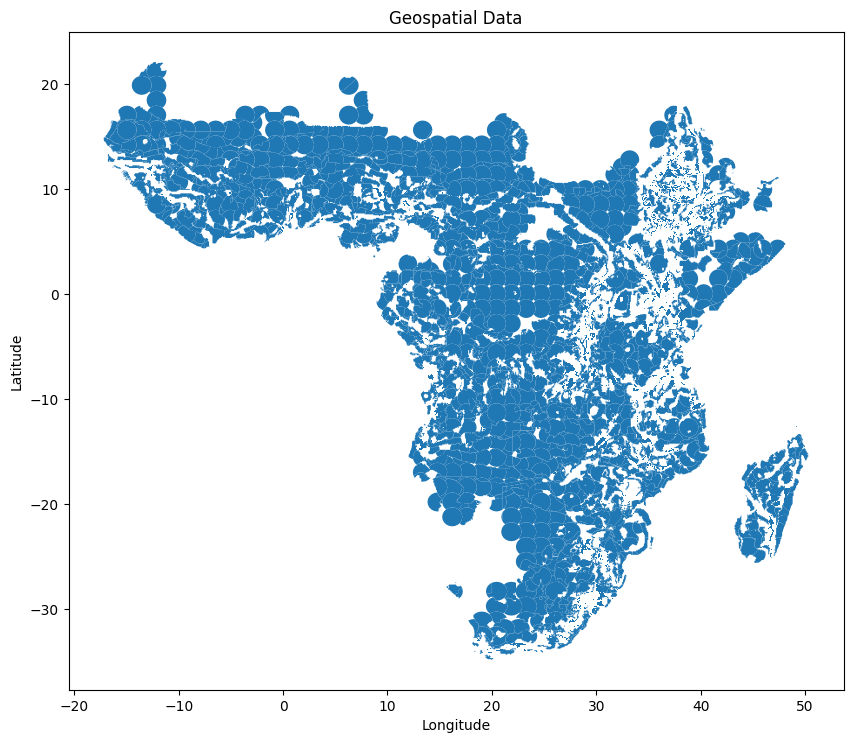

In [10]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax)

# Optional: Customize the plot
ax.set_title("Geospatial Data")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show plot
plt.show()

In [11]:
#a0 = gpd.read_file("../data/viz/atlas-region_admin0_harmonized.json")
#a1 = gpd.read_file("../data/viz/atlas-region_admin1_harmonizedV2@1.json")
#a1.crs = "EPSG:4326"
#a1 = a1.to_crs("EPSG:4326")

a2 = gpd.read_file("../data/viz/atlas-region_admin2_harmonizedV2.json")
a2.crs = "EPSG:4326"
a2 = a2.to_crs("EPSG:4326")
a2["geometry"] = a2.make_valid()

In [12]:
a2.head()

,id,admin2_name,admin1_name,admin0_name,admin_name,iso3,a2_a1_a0,geometry
0,None,'Maoa-Mafubelu,Leribe,Lesotho,'Maoa-Mafubelu,LSO,'Maoa-Mafubelu_Leribe_Lesotho,"POLYGON ((28.32543 -28.94269, 28.32476 -28.943..."
1,None,1er Arrondissement,Analamanga,Madagascar,1er Arrondissement,MDG,1er Arrondissement_Analamanga_Madagascar,"POLYGON ((47.49633 -18.90264, 47.49606 -18.901..."
2,None,2e Arrondissement,Analamanga,Madagascar,2e Arrondissement,MDG,2e Arrondissement_Analamanga_Madagascar,"POLYGON ((47.53360 -18.91775, 47.53386 -18.917..."
3,None,3e Arrondissement,Analamanga,Madagascar,3e Arrondissement,MDG,3e Arrondissement_Analamanga_Madagascar,"POLYGON ((47.53320 -18.91155, 47.53293 -18.908..."
4,None,4e Arrondissement,Analamanga,Madagascar,4e Arrondissement,MDG,4e Arrondissement_Analamanga_Madagascar,"POLYGON ((47.50261 -18.91013, 47.50247 -18.910..."


In [14]:
overlaid = gdf.overlay(a2, how="intersection", keep_geom_type=False).to_crs("EPSG:4326")#.fillna(0)

In [15]:
overlaid[overlaid["ISO3"] != overlaid["iso3"]].sort_values(by=["station_id"])#.groupby(["a2_a1_a0", "ISO3", "station_id"]).count()

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,admin_name,iso3,a2_a1_a0,geometry
5721,1,GMB,1474.000015,679.399994,1672.000000,0.0,None,Bignona,Ziguinchor,Senegal,Bignona,SEN,Bignona_Ziguinchor_Senegal,"MULTIPOLYGON (((-16.64336 13.16671, -16.67600 ..."
5726,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Kombo East,West Coast,Gambia,Kombo East,GMB,Kombo East_West Coast_Gambia,"POLYGON ((-16.59332 13.16671, -16.59332 13.166..."
5729,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Kombo South,West Coast,Gambia,Kombo South,GMB,Kombo South_West Coast_Gambia,"MULTIPOLYGON (((-16.68620 13.16216, -16.68790 ..."
5724,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Kombo Central,West Coast,Gambia,Kombo Central,GMB,Kombo Central_West Coast_Gambia,"POLYGON ((-16.60231 13.16671, -16.60231 13.166..."
5732,2,GMB,1988.899994,0.000000,8107.500122,0.0,None,Foundiougne,Fatick,Senegal,Foundiougne,SEN,Foundiougne_Fatick_Senegal,"POLYGON ((-16.34333 13.60004, -16.31346 13.600..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,1362,SOM,28.699999,14.300000,0.000000,0.0,None,Fafan,Somali,Ethiopia,Fafan,ETH,Fafan_Somali_Ethiopia,"POLYGON ((44.10496 8.96349, 44.03842 8.98593, ..."
5526,1362,ETH,0.000000,0.000000,0.000000,0.0,None,Hargeysa,Woqooyi Galbeed,Somalia,Hargeysa,SOM,Hargeysa_Woqooyi Galbeed_Somalia,"MULTIPOLYGON (((44.50245 8.83456, 44.52008 8.8..."
5520,1362,SOM,28.699999,14.300000,0.000000,0.0,None,Jarar,Somali,Ethiopia,Jarar,ETH,Jarar_Somali_Ethiopia,"POLYGON ((44.60908 8.79864, 44.58690 8.80591, ..."
5608,1371,SOM,42.200000,177.100000,0.000000,0.0,None,Shabelle,Somali,Ethiopia,Shabelle,ETH,Shabelle_Somali_Ethiopia,"POLYGON ((44.72289 4.92891, 44.96553 4.91803, ..."


In [16]:
overlaid["station_id"] = overlaid["station_id"].astype(int)
overlaid["area_km2"] = (overlaid.to_crs(crs=3857).area / 10**6)
overlaid["area_ha"] = overlaid["area_km2"] * 100
overlaid

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,admin_name,iso3,a2_a1_a0,geometry,area_km2,area_ha
0,1076,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((23.67067 9.44099, 23.67181 9.45007, ...",6726.080715,672608.071529
1,386,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((23.47225 9.13063, 23.47694 9.15182, ...",1614.932051,161493.205098
2,417,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((24.17452 8.69817, 24.15536 8.82042, ...",575.412837,57541.283732
3,387,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((24.15893 10.23690, 24.20282 9.95741,...",4526.542861,452654.286105
4,418,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((24.63774 9.40608, 24.62917 9.40037, ...",8548.600572,854860.057160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kayonza,Eastern Province,Rwanda,Kayonza,RWA,Kayonza_Eastern Province_Rwanda,"MULTIPOLYGON (((30.57047 -2.06201, 30.56897 -2...",344.194308,34419.430777
12214,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kicukiro,Kigali City,Rwanda,Kicukiro,RWA,Kicukiro_Kigali City_Rwanda,"POLYGON ((30.15383 -1.95866, 30.16356 -1.96565...",68.652915,6865.291469
12215,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kirehe,Eastern Province,Rwanda,Kirehe,RWA,Kirehe_Eastern Province_Rwanda,"MULTIPOLYGON (((30.73713 -2.07222, 30.70854 -2...",46.192534,4619.253394
12216,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Ngoma,Eastern Province,Rwanda,Ngoma,RWA,Ngoma_Eastern Province_Rwanda,"MULTIPOLYGON (((30.57047 -2.24770, 30.37416 -2...",519.903183,51990.318313


In [17]:
total_area_by_station_id = overlaid.groupby("station_id")["area_ha"].sum()
total_area_by_station_id

station_id
1       3.315387e+05
2       1.140552e+06
3       1.118642e+06
4       4.631672e+05
5       6.543916e+05
            ...     
1385    5.283250e+05
1386    4.123860e+04
1387    4.784873e+05
1388    9.497517e+05
1389    1.399414e+05
Name: area_ha, Length: 1389, dtype: float64

In [18]:
overlaid = overlaid.join(total_area_by_station_id, on="station_id", rsuffix="_station_total")
overlaid["perc_station_area"] = overlaid["area_ha"] / overlaid["area_ha_station_total"]
overlaid

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,admin_name,iso3,a2_a1_a0,geometry,area_km2,area_ha,area_ha_station_total,perc_station_area
0,1076,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((23.67067 9.44099, 23.67181 9.45007, ...",6726.080715,672608.071529,1.057945e+06,0.635769
1,386,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((23.47225 9.13063, 23.47694 9.15182, ...",1614.932051,161493.205098,1.327516e+06,0.121651
2,417,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((24.17452 8.69817, 24.15536 8.82042, ...",575.412837,57541.283732,9.585727e+05,0.060028
3,387,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((24.15893 10.23690, 24.20282 9.95741,...",4526.542861,452654.286105,2.031870e+06,0.222777
4,418,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,Al Radoum,SDN,Al Radoum_South Darfur_Sudan,"POLYGON ((24.63774 9.40608, 24.62917 9.40037, ...",8548.600572,854860.057160,1.640049e+06,0.521241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kayonza,Eastern Province,Rwanda,Kayonza,RWA,Kayonza_Eastern Province_Rwanda,"MULTIPOLYGON (((30.57047 -2.06201, 30.56897 -2...",344.194308,34419.430777,4.113279e+05,0.083679
12214,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kicukiro,Kigali City,Rwanda,Kicukiro,RWA,Kicukiro_Kigali City_Rwanda,"POLYGON ((30.15383 -1.95866, 30.16356 -1.96565...",68.652915,6865.291469,4.113279e+05,0.016691
12215,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kirehe,Eastern Province,Rwanda,Kirehe,RWA,Kirehe_Eastern Province_Rwanda,"MULTIPOLYGON (((30.73713 -2.07222, 30.70854 -2...",46.192534,4619.253394,4.113279e+05,0.011230
12216,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Ngoma,Eastern Province,Rwanda,Ngoma,RWA,Ngoma_Eastern Province_Rwanda,"MULTIPOLYGON (((30.57047 -2.24770, 30.37416 -2...",519.903183,51990.318313,4.113279e+05,0.126396


In [21]:
crops = ["maize", "sorghum", "millet", "wheat"]
for c in crops:
    overlaid[f"{c}_area_admin2_ha"] = overlaid["perc_station_area"] * overlaid[f"{c}_area"]

overlaid

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,...,a2_a1_a0,geometry,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
0,1076,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"POLYGON ((23.67067 9.44099, 23.67181 9.45007, ...",6726.080715,672608.071529,1.057945e+06,0.635769,0.000000,0.000000,0.000000,0.000000
1,386,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"POLYGON ((23.47225 9.13063, 23.47694 9.15182, ...",1614.932051,161493.205098,1.327516e+06,0.121651,0.000000,0.000000,0.000000,0.000000
2,417,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"POLYGON ((24.17452 8.69817, 24.15536 8.82042, ...",575.412837,57541.283732,9.585727e+05,0.060028,0.000000,0.000000,0.000000,0.000000
3,387,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"POLYGON ((24.15893 10.23690, 24.20282 9.95741,...",4526.542861,452654.286105,2.031870e+06,0.222777,0.000000,0.000000,0.000000,0.000000
4,418,SDN,0.000000,0.000000,0.000000,0.0,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"POLYGON ((24.63774 9.40608, 24.62917 9.40037, ...",8548.600572,854860.057160,1.640049e+06,0.521241,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kayonza,Eastern Province,Rwanda,...,Kayonza_Eastern Province_Rwanda,"MULTIPOLYGON (((30.57047 -2.06201, 30.56897 -2...",344.194308,34419.430777,4.113279e+05,0.083679,166.370225,92.557141,469.521852,4.928682
12214,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kicukiro,Kigali City,Rwanda,...,Kicukiro_Kigali City_Rwanda,"POLYGON ((30.15383 -1.95866, 30.16356 -1.96565...",68.652915,6865.291469,4.113279e+05,0.016691,33.184166,18.461425,93.650717,0.983074
12215,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Kirehe,Eastern Province,Rwanda,...,Kirehe_Eastern Province_Rwanda,"MULTIPOLYGON (((30.73713 -2.07222, 30.70854 -2...",46.192534,4619.253394,4.113279e+05,0.011230,22.327686,12.421614,63.012094,0.661453
12216,529,RWA,1988.199978,1106.099994,5611.000015,58.9,None,Ngoma,Eastern Province,Rwanda,...,Ngoma_Eastern Province_Rwanda,"MULTIPOLYGON (((30.57047 -2.24770, 30.37416 -2...",519.903183,51990.318313,4.113279e+05,0.126396,251.301105,139.806938,709.209595,7.444742


In [22]:
overlaid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12218 entries, 0 to 12217
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   station_id              12218 non-null  int64   
 1   ISO3                    12197 non-null  object  
 2   maize_area              12218 non-null  float64 
 3   sorghum_area            12218 non-null  float64 
 4   millet_area             12218 non-null  float64 
 5   wheat_area              12218 non-null  float64 
 6   id                      0 non-null      object  
 7   admin2_name             12218 non-null  object  
 8   admin1_name             12218 non-null  object  
 9   admin0_name             12218 non-null  object  
 10  admin_name              12218 non-null  object  
 11  iso3                    12218 non-null  object  
 12  a2_a1_a0                12218 non-null  object  
 13  geometry                12218 non-null  geometry
 14  area_km2      

In [23]:
overlaid.groupby(["station_id", "admin0_name", "admin1_name", "admin2_name", "ISO3"]).count().head(20)

maize_area  \
station_id admin0_name admin1_name admin2_name          ISO3               
1          Gambia      West Coast  Kombo Central        GMB            1   
                                                        SEN            1   
                                   Kombo East           GMB            1   
                                                        SEN            1   
                                   Kombo North/St Marie GMB            1   
                                   Kombo South          GMB            1   
                                                        SEN            1   
           Senegal     Ziguinchor  Bignona              GMB            1   
                                                        SEN            1   
                                   Oussouye             SEN            1   
                                   Ziguinchor           SEN            1   
2          Gambia      North Bank  Central Baddibu      GMB            1   
                                   Illiassa             GMB            1   
                                   Jokadu               GMB            1   
                                   Lower Baddibu        GMB            1   
                                   Lower Niumi          GMB            1   
                                   Upper Niumi          GMB            1   
           Senegal     Diourbel    Bambey               SEN            1   
                                   Diourbel             SEN            1   
                       Fatick      Fatick               SEN            1   

                                                              sorghum_area  \
station_id admin0_name admin1_name admin2_name          ISO3                 
1          Gambia      West Coast  Kombo Central        GMB              1   
                                                        SEN              1   
                                   Kombo East           GMB              1   
                                                        SEN              1   
                                   Kombo North/St Marie GMB              1   
                                   Kombo South          GMB              1   
                                                        SEN              1   
           Senegal     Ziguinchor  Bignona              GMB              1   
                                                        SEN              1   
                                   Oussouye             SEN              1   
                                   Ziguinchor           SEN              1   
2          Gambia      North Bank  Central Baddibu      GMB              1   
                                   Illiassa             GMB              1   
                                   Jokadu               GMB              1   
                                   Lower Baddibu        GMB              1   
                                   Lower Niumi          GMB              1   
                                   Upper Niumi          GMB              1   
           Senegal     Diourbel    Bambey               SEN              1   
                                   Diourbel             SEN              1   
                       Fatick      Fatick               SEN              1   

                                                              millet_area  \
station_id admin0_name admin1_name admin2_name          ISO3                
1          Gambia      West Coast  Kombo Central        GMB             1   
                                                        SEN             1   
                                   Kombo East           GMB             1   
                                                        SEN             1   
                                   Kombo North/St Marie GMB             1   
                                   Kombo South          GMB             1   
                                                        

In [24]:
overlaid[(overlaid["station_id"] == 1) & (overlaid["admin2_name"] == "Kombo Central")].T

,5723,5724
station_id,1,1
ISO3,GMB,SEN
maize_area,1474.000015,1244.399995
sorghum_area,679.399994,151.2
millet_area,1672.0,8572.799981
wheat_area,0.0,0.0
id,None,None
admin2_name,Kombo Central,Kombo Central
admin1_name,West Coast,West Coast
admin0_name,Gambia,Gambia


In [25]:
overlaid[overlaid["ISO3"] != overlaid["iso3"]]

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,...,a2_a1_a0,geometry,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
6,1076,CAF,63.099999,17.100000,6.400000,0.000000,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"MULTIPOLYGON (((23.69866 9.67706, 23.69852 9.6...",77.616380,7761.637962,1.057945e+06,0.007337,0.462935,0.125455,0.046954,0.000000
7,386,CAF,417.899997,117.600000,39.900000,0.000000,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"MULTIPOLYGON (((24.16610 8.70287, 24.16616 8.7...",54.016597,5401.659715,1.327516e+06,0.004069,1.700435,0.478514,0.162353,0.000000
8,417,CAF,0.000000,0.000000,0.000000,0.000000,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"MULTIPOLYGON (((24.26466 8.69121, 24.26384 8.6...",0.987266,98.726621,9.585727e+05,0.000103,0.000000,0.000000,0.000000,0.000000
9,387,CAF,2854.199983,965.300002,365.300002,0.000000,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"POLYGON ((23.44085 10.26997, 23.58572 10.04029...",11.524564,1152.456362,2.031870e+06,0.000567,1.618874,0.547508,0.207194,0.000000
10,1076,SSD,0.000000,0.000000,0.000000,0.000000,None,Al Radoum,South Darfur,Sudan,...,Al Radoum_South Darfur_Sudan,"MULTIPOLYGON (((24.58301 9.22857, 24.58730 9.2...",2.466010,246.601013,1.057945e+06,0.000233,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12158,528,RWA,0.000000,0.000000,0.000000,0.700000,None,Bugabira,Kirundo,Burundi,...,Bugabira_Kirundo_Burundi,"MULTIPOLYGON (((29.98718 -2.33793, 29.98718 -2...",2.820930,282.093039,6.644852e+05,0.000425,0.000000,0.000000,0.000000,0.000297
12161,528,BDI,35044.099866,12263.599984,2778.300015,436.799988,None,Bugesera,Eastern Province,Rwanda,...,Bugesera_Eastern Province_Rwanda,"POLYGON ((29.97078 -2.33140, 29.98240 -2.33542...",0.195347,19.534710,6.644852e+05,0.000029,1.030236,0.360529,0.081677,0.012841
12176,528,RWA,0.000000,0.000000,0.000000,0.700000,None,Marangara,Ngozi,Burundi,...,Marangara_Ngozi_Burundi,"MULTIPOLYGON (((29.93062 -2.65507, 29.93059 -2...",0.633804,63.380397,6.644852e+05,0.000095,0.000000,0.000000,0.000000,0.000067
12182,528,RWA,0.000000,0.000000,0.000000,0.700000,None,Ntega,Kirundo,Burundi,...,Ntega_Kirundo_Burundi,"MULTIPOLYGON (((29.96837 -2.47973, 29.96782 -2...",4.423826,442.382607,6.644852e+05,0.000666,0.000000,0.000000,0.000000,0.000466


In [27]:
overlaid.to_csv("overlaid_admin_zones.csv", index=False)

In [126]:
overlaid[overlaid["station_id"] == 1]

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,...,a2_a1_a0,geometry,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
5721,1,GMB,1474.000015,679.399994,1672.000000,0.0,None,Bignona,Ziguinchor,Senegal,...,Bignona_Ziguinchor_Senegal,"MULTIPOLYGON (((-16.64336 13.16671, -16.67600 ...",11.497287,1149.728711,331538.700352,3.467857e-03,5.111621,2.356062,5.798256,0.0
5722,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Bignona,Ziguinchor,Senegal,...,Bignona_Ziguinchor_Senegal,"POLYGON ((-16.77935 12.80132, -16.77830 12.804...",2969.667858,296966.785849,331538.700352,8.957228e-01,1114.637496,135.433293,7678.852735,0.0
5723,1,GMB,1474.000015,679.399994,1672.000000,0.0,None,Kombo Central,West Coast,Gambia,...,Kombo Central_West Coast_Gambia,"POLYGON ((-16.60578 13.16671, -16.67898 13.168...",47.121025,4712.102528,331538.700352,1.421283e-02,20.949709,9.656195,23.763848,0.0
5724,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Kombo Central,West Coast,Gambia,...,Kombo Central_West Coast_Gambia,"POLYGON ((-16.60231 13.16671, -16.60231 13.166...",0.001933,0.193328,331538.700352,5.831221e-07,0.000726,0.000088,0.004999,0.0
5725,1,GMB,1474.000015,679.399994,1672.000000,0.0,None,Kombo East,West Coast,Gambia,...,Kombo East_West Coast_Gambia,"POLYGON ((-16.59332 13.17685, -16.59332 13.166...",1.169869,116.986916,331538.700352,3.528605e-04,0.520116,0.239733,0.589983,0.0
5726,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Kombo East,West Coast,Gambia,...,Kombo East_West Coast_Gambia,"POLYGON ((-16.59332 13.16671, -16.59332 13.166...",0.010035,1.003457,331538.700352,3.026667e-06,0.003766,0.000458,0.025947,0.0
5727,1,GMB,1474.000015,679.399994,1672.000000,0.0,None,Kombo North/St Marie,West Coast,Gambia,...,Kombo North/St Marie_West Coast_Gambia,"POLYGON ((-16.75997 13.34350, -16.67664 13.343...",9.420345,942.034506,331538.700352,2.841401e-03,4.188226,1.930448,4.750823,0.0
5728,1,GMB,1474.000015,679.399994,1672.000000,0.0,None,Kombo South,West Coast,Gambia,...,Kombo South_West Coast_Gambia,"POLYGON ((-16.73250 13.07406, -16.75777 13.076...",228.529769,22852.976867,331538.700352,6.893004e-02,101.602884,46.831071,115.251032,0.0
5729,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Kombo South,West Coast,Gambia,...,Kombo South_West Coast_Gambia,"MULTIPOLYGON (((-16.68620 13.16216, -16.68790 ...",2.588436,258.843648,331538.700352,7.807343e-04,0.971546,0.118047,6.693079,0.0
10482,1,SEN,1244.399995,151.200000,8572.799981,0.0,None,Oussouye,Ziguinchor,Senegal,...,Oussouye_Ziguinchor_Senegal,"POLYGON ((-16.65576 12.59355, -16.58375 12.632...",35.807839,3580.783851,331538.700352,1.080050e-02,13.440143,1.633036,92.590529,0.0


In [136]:
overlaid.columns.tolist()

['station_id',
 'ISO3',
 'maize_area',
 'sorghum_area',
 'millet_area',
 'wheat_area',
 'id',
 'admin2_name',
 'admin1_name',
 'admin0_name',
 'admin_name',
 'iso3',
 'a2_a1_a0',
 'geometry',
 'area_km2',
 'area_ha',
 'area_ha_station_total',
 'perc_station_area',
 'maize_area_admin2_ha',
 'sorghum_area_admin2_ha',
 'millet_area_admin2_ha',
 'wheat_area_admin2_ha']

In [141]:
overlaid.groupby(["admin1_name", "station_id",])[[
'area_km2',
'area_ha',
'area_ha_station_total',
'perc_station_area',
'maize_area_admin2_ha',
'sorghum_area_admin2_ha',
'millet_area_admin2_ha',
'wheat_area_admin2_ha'
]].sum().reset_index()

,admin1_name,station_id,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
0,Abia,130,4045.681688,404568.168849,2.609086e+07,0.248098,30877.285811,0.000000,0.000000,0.000000
1,Abia,859,5.053327,505.332676,4.540588e+05,0.001113,7.588801,0.000000,0.000000,0.000000
2,Abia,860,625.854180,62585.417951,3.617379e+06,0.051904,4403.893865,341.699230,0.000000,0.000000
3,Abia,868,5.883321,588.332098,1.114389e+06,0.000528,29.636265,2.587389,0.213236,0.000000
4,Adamaoua,165,8129.359052,812935.905196,5.845651e+06,0.834401,5.507590,1084.784709,14.595799,4.998327
...,...,...,...,...,...,...,...,...,...,...
3906,Zinder/Diffa,874,478.527746,47852.774550,4.785277e+04,1.000000,0.000000,9584.600098,10591.799805,7.100000
3907,Zinder/Diffa,884,502.706112,50270.611183,5.027061e+04,1.000000,0.000000,9191.600098,10287.199951,7.700000
3908,Zinder/Diffa,893,497.971490,49797.148980,5.006601e+04,0.994630,0.000000,12502.298575,6382.539869,3.779594
3909,Zinder/Diffa,907,502.699098,50269.909795,5.026991e+04,1.000000,0.000000,503.199989,409.000015,0.100000


In [132]:
grouped = df.groupby(["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon", "geometry"])[["yield_rfd", "yield_irr"]].sum().reset_index()#.join(overlaid.set_index("station_id"), on="station_id", rsuffix="_admin2")
grouped["station_id"] = grouped["station_id"].astype(int)
grouped[grouped["station_id"] == 1]

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,geometry,yield_rfd,yield_irr
0,1,maize,1,current,SSP370,MPI,2005.0,POINT (-16.37565 12.79198),129.883990,140.221948
1,1,maize,1,current,SSP370,MPI,2030.0,POINT (-16.37565 12.79198),116.599299,126.977412
2,1,maize,1,current,SSP370,MPI,2050.0,POINT (-16.37565 12.79198),109.388030,127.810265
3,1,maize,1,current,SSP585,MPI,2005.0,POINT (-16.37565 12.79198),129.883990,140.221948
4,1,maize,1,current,SSP585,MPI,2030.0,POINT (-16.37565 12.79198),112.056883,126.209504
5,1,maize,1,current,SSP585,MPI,2050.0,POINT (-16.37565 12.79198),106.484059,125.870380
6,1,maize,1,early,SSP370,MPI,2005.0,POINT (-16.37565 12.79198),118.650111,140.853286
7,1,maize,1,early,SSP370,MPI,2030.0,POINT (-16.37565 12.79198),109.036253,127.283915
8,1,maize,1,early,SSP370,MPI,2050.0,POINT (-16.37565 12.79198),102.390182,127.739444
9,1,maize,1,early,SSP585,MPI,2005.0,POINT (-16.37565 12.79198),118.650111,140.853286


In [32]:
df = gpd.sjoin(df, a2[["admin0_name", "admin1_name", "admin2_name", "geometry"]], how="left", predicate='within')
df.drop(columns=["index_right"], inplace=True)

In [35]:
df = gpd.sjoin(df, gdf[["maize_area", "sorghum_area", "millet_area", "wheat_area", "geometry"]], how="left", predicate='within')
df.drop(columns=["index_right"], inplace=True)

In [36]:
crops = df["crop"].unique()

grouped_by_station = df.groupby("station_id")


for c in crops:
    df[f"{c}_area_by_yield_rfd"] = df[f"{c}_area"] * df["yield_rfd"]
    df[f"{c}_area_by_yield_irr"] = df[f"{c}_area"] * df["yield_irr"]

df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,admin0_name,admin1_name,admin2_name,maize_area,sorghum_area,millet_area,wheat_area,maize_area_by_yield_rfd,maize_area_by_yield_irr
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8292.943696,8616.410247
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8331.950420,8873.055629
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8286.559491,8581.706105
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8351.370335,8639.391730
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8651.519999,9037.298653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,332181.470083,340636.210500
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,342304.176204,341260.283095
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,359967.916701,364628.187819
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,329378.404832,342515.123849


In [37]:
df.groupby(["station_id", "crop"])[["yield_rfd"]].sum()

,,yield_rfd
station_id,crop,
1,maize,2153.941300
10,maize,2540.838005
100,maize,2695.988487
1000,maize,4723.401488
1001,maize,4639.323686
...,...,...
995,maize,3497.036971
996,maize,3507.944758
997,maize,3324.645865


In [38]:
gdf

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
0,1076,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
1,386,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
2,417,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
3,356,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
4,389,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."
...,...,...,...,...,...,...,...
2024,528,RWA,0.000000,0.000000,0.0,0.7,GEOMETRYCOLLECTION (POLYGON ((29.82052 -2.1555...
2025,1149,RWA,3854.300049,315.800003,0.0,2.0,"POLYGON ((28.98724 -2.40554, 28.90391 -2.40554..."
2026,25,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.08234 21.33236, -13.07424 21.332..."
2027,765,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.26019 21.33456, -13.20886 21.333..."


In [39]:
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,admin0_name,admin1_name,admin2_name,maize_area,sorghum_area,millet_area,wheat_area,maize_area_by_yield_rfd,maize_area_by_yield_irr
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8292.943696,8616.410247
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8331.950420,8873.055629
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8286.559491,8581.706105
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8351.370335,8639.391730
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8651.519999,9037.298653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,332181.470083,340636.210500
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,342304.176204,341260.283095
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,359967.916701,364628.187819
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,329378.404832,342515.123849


# Kenya

/home/sebasgar/miniconda/envs/crop/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


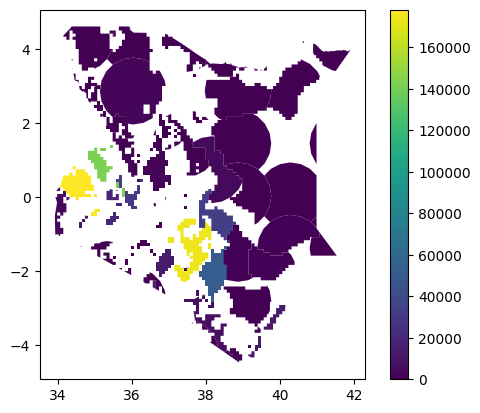

In [40]:
fig, ax = plt.subplots(1, 1)
ken = gdf[gdf["ISO3"] == "KEN"]
ken["station_id"] = ken["station_id"].astype(int)
ken.plot(column="maize_area", ax=ax, legend=True)
plt.show()

In [ ]:
ken.explore(
    column="maize_area",
)

In [ ]:
df_ken = df[df["admin0_name"] == "Kenya"].drop(columns=["planting_date"])[["station_id", "yield_rfd", "yield_irr", "geometry"]]
df_ken.explore(
    column="yield_rfd",
)

In [44]:
df[df["station_id"].astype(int) == 610]

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,admin0_name,admin1_name,admin2_name,maize_area,sorghum_area,millet_area,wheat_area,maize_area_by_yield_rfd,maize_area_by_yield_irr
191407,610,maize,1,double,current,SSP370,MPI,2005.0,1995-07-12,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.543724e+06,1.905467e+06
191408,610,maize,1,double,current,SSP370,MPI,2005.0,1996-07-13,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.597612e+06,1.961012e+06
191409,610,maize,1,double,current,SSP370,MPI,2005.0,1997-07-28,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.310910e+06,1.791950e+06
191410,610,maize,1,double,current,SSP370,MPI,2005.0,1998-07-14,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.522097e+06,1.833484e+06
191411,610,maize,1,double,current,SSP370,MPI,2005.0,1999-07-23,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.722972e+06,1.862494e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191585,610,maize,1,double,late,SSP585,MPI,2050.0,2056-07-29,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.559638e+06,1.686761e+06
191586,610,maize,1,double,late,SSP585,MPI,2050.0,2057-07-28,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.794887e+06,1.829766e+06
191587,610,maize,1,double,late,SSP585,MPI,2050.0,2058-07-22,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.559869e+06,1.790122e+06
191588,610,maize,1,double,late,SSP585,MPI,2050.0,2059-07-31,0.042026,...,POINT (34.62414 0.04203),Kenya,Vihiga,Luanda,178127.401001,26962.09997,8542.499789,38.0,1.718975e+06,1.812308e+06


In [ ]:
a2_ken = a2[a2["admin0_name"] == "Kenya"]
a2_ken.explore(column="admin2_name")

In [46]:
# Area of Kenya in km^2
a2_ken.to_crs(crs=3857).area.sum() / 10**6

596471.0013920185

In [47]:
ken.sort_values(by="station_id")

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
1005,584,KEN,1580.099976,0.000000,262.200012,0.000000,"POLYGON ((34.07026 0.26795, 34.07026 0.26097, ..."
1006,609,KEN,10667.900146,1398.200035,1364.199989,0.000000,"MULTIPOLYGON (((34.57023 -0.65564, 34.57023 -0..."
1007,610,KEN,178127.401001,26962.099970,8542.499789,38.000000,"MULTIPOLYGON (((34.73689 0.76094, 34.48690 0.7..."
1011,612,KEN,11.600000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((34.35461 3.73677, 34.35721 3.7..."
1025,613,KEN,9.400000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((34.82021 3.51077, 34.98687 3.5..."
994,629,KEN,21.900001,0.000000,0.000000,0.100000,"MULTIPOLYGON (((35.90348 -2.05161, 35.98681 -2..."
997,630,KEN,4.800000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((35.79195 -1.98890, 35.79457 -1..."
990,631,KEN,30740.500137,379.900000,139.200003,953.799997,"MULTIPOLYGON (((35.65350 0.42762, 35.65350 0.2..."
1012,632,KEN,762.400014,69.999999,81.000000,0.000000,"MULTIPOLYGON (((35.32018 1.84420, 35.40351 1.8..."
1026,633,KEN,2424.099938,1535.699951,0.000000,0.000000,"POLYGON ((35.18559 2.59558, 35.22859 2.51083, ..."


# x

In [48]:
cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name", "admin1_name", "admin2_name"]

df.groupby(cols_to_groupby + admins[:3]).count()

system  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name      admin1_name admin2_name           
1          maize 1     current  SSP370 MPI 2005.0  Senegal          Ziguinchor  Bignona          20   
                                           2030.0  Senegal          Ziguinchor  Bignona          19   
                                           2050.0  Senegal          Ziguinchor  Bignona          20   
                                SSP585 MPI 2005.0  Senegal          Ziguinchor  Bignona          20   
                                           2030.0  Senegal          Ziguinchor  Bignona          19   
...                                                                                             ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa Kasaï       Kamonia          19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia          20   
                                SSP585 MPI 2005.0  Congo - Kinshasa Kasaï       Kamonia          19   
                                           2030.0  Congo - Kinshasa Kasaï       Kamonia          19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia          20   

                                                                                             planting_date  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name      admin1_name admin2_name                  
1          maize 1     current  SSP370 MPI 2005.0  Senegal          Ziguinchor  Bignona                 20   
                                           2030.0  Senegal          Ziguinchor  Bignona                 19   
                                           2050.0  Senegal          Ziguinchor  Bignona                 20   
                                SSP585 MPI 2005.0  Senegal          Ziguinchor  Bignona                 20   
                                           2030.0  Senegal          Ziguinchor  Bignona                 19   
...                                                                                                    ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa Kasaï       Kamonia                 19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia                 20   
                                SSP585 MPI 2005.0  Congo - Kinshasa Kasaï       Kamonia                 19   
                                           2030.0  Congo - Kinshasa Kasaï       Kamonia                 19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia                 20   

                                                                                             lat  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name      admin1_name admin2_name        
1          maize 1     current  SSP370 MPI 2005.0  Senegal          Ziguinchor  Bignona       20   
                                           2030.0  Senegal          Ziguinchor  Bignona       19   
                                           2050.0  Senegal          Ziguinchor  Bignona       20   
                                SSP585 MPI 2005.0  Senegal          Ziguinchor  Bignona       20   
                                           2030.0  Senegal          Ziguinchor  Bignona       19   
...                                                                                          ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa Kasaï       Kamonia       19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia       20   
                                SSP585 MPI 2005.0  Congo - Kinshasa Kasaï       Kamonia       19   
                                           2030.0  Congo - Kinshasa Kasaï       Kamonia       19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia       20   

                     

In [49]:
df.groupby(cols_to_groupby + admins[:3])["maize_area"].sum()

station_id  crop   cycle  cultivar  ssp     gcm  horizon  admin0_name       admin1_name  admin2_name
1           maize  1      current   SSP370  MPI  2005.0   Senegal           Ziguinchor   Bignona         24887.999907
                                                 2030.0   Senegal           Ziguinchor   Bignona         23643.599911
                                                 2050.0   Senegal           Ziguinchor   Bignona         24887.999907
                                    SSP585  MPI  2005.0   Senegal           Ziguinchor   Bignona         24887.999907
                                                 2030.0   Senegal           Ziguinchor   Bignona         23643.599911
                                                                                                            ...      
999         maize  1      late      SSP370  MPI  2030.0   Congo - Kinshasa  Kasaï        Kamonia        742461.100890
                                                 2050.0   Congo - Kinshas

In [50]:
df.groupby(cols_to_groupby + admins[:1])[["maize_area"]].sum()

maize_area
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                    
1          maize 1     current  SSP370 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
                                           2050.0  Senegal            24887.999907
                                SSP585 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
...                                                                            ...
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937
                                SSP585 MPI 2005.0  Congo - Kinshasa  742461.100890
                                           2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937

[27594 rows x 1 columns]

In [51]:
gdf["station_id"] = gdf["station_id"].astype(int)
gdf.set_index("station_id", inplace=True)
gdf

,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
station_id,,,,,,
1076,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
386,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
417,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
356,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
389,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."
...,...,...,...,...,...,...
528,RWA,0.000000,0.000000,0.0,0.7,GEOMETRYCOLLECTION (POLYGON ((29.82052 -2.1555...
1149,RWA,3854.300049,315.800003,0.0,2.0,"POLYGON ((28.98724 -2.40554, 28.90391 -2.40554..."
25,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.08234 21.33236, -13.07424 21.332..."


In [52]:
df[["lat", "lon", "station_id"]].drop_duplicates().sort_values(by="station_id")

,lat,lon,station_id
0,12.791975,-16.375654,1
180,11.375314,-13.542333,10
360,8.541992,2.040939,100
540,-4.916287,19.749201,1000
900,-3.499626,19.749201,1001
...,...,...,...
272855,-11.999592,19.749201,995
273029,-10.582931,19.749201,996
273203,-9.166270,19.749201,997
273377,-7.749609,19.749201,998


In [53]:
cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name", "admin1_name", "admin2_name"]
df[cols_to_groupby + admins].drop_duplicates()

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,admin1_name,admin2_name
0,1,maize,1,current,SSP370,MPI,2005.0,Senegal,Ziguinchor,Bignona
20,1,maize,1,current,SSP370,MPI,2030.0,Senegal,Ziguinchor,Bignona
39,1,maize,1,current,SSP370,MPI,2050.0,Senegal,Ziguinchor,Bignona
59,1,maize,1,current,SSP370,MPI,NaN,Senegal,Ziguinchor,Bignona
60,1,maize,1,early,SSP370,MPI,2005.0,Senegal,Ziguinchor,Bignona
...,...,...,...,...,...,...,...,...,...,...
273631,999,maize,1,early,SSP585,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia
273650,999,maize,1,early,SSP585,MPI,2050.0,Congo - Kinshasa,Kasaï,Kamonia
273670,999,maize,1,late,SSP585,MPI,2005.0,Congo - Kinshasa,Kasaï,Kamonia
273689,999,maize,1,late,SSP585,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia


In [54]:
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,admin0_name,admin1_name,admin2_name,maize_area,sorghum_area,millet_area,wheat_area,maize_area_by_yield_rfd,maize_area_by_yield_irr
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8292.943696,8616.410247
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8331.950420,8873.055629
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8286.559491,8581.706105
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8351.370335,8639.391730
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,POINT (-16.37565 12.79198),Senegal,Ziguinchor,Bignona,1244.399995,151.2,8572.799981,0.0,8651.519999,9037.298653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,332181.470083,340636.210500
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,342304.176204,341260.283095
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,359967.916701,364628.187819
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,POINT (19.74920 -6.33295),Congo - Kinshasa,Kasaï,Kamonia,39076.900047,0.2,0.100000,0.0,329378.404832,342515.123849


In [57]:
overlaid.groupby(["admin0_name"]).count()

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin_name,...,a2_a1_a0,geometry,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
admin0_name,,,,,,,,,,,,,,,,,,,,,
Angola,604,604,604,604,604,604,0,604,604,604,...,604,604,604,604,604,604,604,604,604,604
Benin,167,167,167,167,167,167,0,167,167,167,...,167,167,167,167,167,167,167,167,167,167
Botswana,164,164,164,164,164,164,0,164,164,164,...,164,164,164,164,164,164,164,164,164,164
Burkina Faso,195,195,195,195,195,195,0,195,195,195,...,195,195,195,195,195,195,195,195,195,195
Burundi,170,170,170,170,170,170,0,170,170,170,...,170,170,170,170,170,170,170,170,170,170
Cameroon,200,200,200,200,200,200,0,200,200,200,...,200,200,200,200,200,200,200,200,200,200
Central African Republic,327,327,327,327,327,327,0,327,327,327,...,327,327,327,327,327,327,327,327,327,327
Chad,307,307,307,307,307,307,0,307,307,307,...,307,307,307,307,307,307,307,307,307,307
Congo - Brazzaville,294,294,294,294,294,294,0,294,294,294,...,294,294,294,294,294,294,294,294,294,294


In [59]:
overlaid[overlaid["admin0_name"] == "Angola"]["station_id"].nunique()

120

# Try

In [241]:
from tqdm import tqdm

admins = ["admin0_name", "admin1_name", "admin2_name"]
cols_to_groupby = ["crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
rows = []
crops = ["maize", "sorghum", "millet", "wheat"]

rows = []


for i in range(1, len(admins)):
    levels = admins[:i]
    none_levels = admins[i:]
    print(levels)

    for geo_group, subdf in tqdm(overlaid.groupby(by=levels + ["station_id"])):
        geo_group = list(geo_group[:len(levels)]) + [None] * len(none_levels) + [geo_group[-1]]
        #if geo_group[0] != "Kenya": #or geo_group[-1] != 610:
        #    continue
        summed_areas = subdf[[
            "area_km2",
            "area_ha",
            "area_ha_station_total",
            "perc_station_area",
            "maize_area_admin2_ha",
            "sorghum_area_admin2_ha",
            "millet_area_admin2_ha",
            "wheat_area_admin2_ha"
        ]].sum()
        station_id = geo_group[-1]

        for yield_group, yield_df in df[df["station_id"].astype(int) == station_id].groupby(cols_to_groupby):
            crop = yield_group[0]
            total_crop_area = subdf.drop_duplicates(subset=["ISO3"])[f"{crop}_area"].sum()
            summed_yields = yield_df[["yield_irr", "yield_rfd"]].mean()
            if total_crop_area == 0:
                w_yield_rfd = 0
                w_yield_irr = 0
            else:
                w_yield_rfd = (summed_yields["yield_rfd"] * summed_areas[f"{crop}_area_admin2_ha"]) / total_crop_area
                w_yield_irr = (summed_yields["yield_irr"] * summed_areas[f"{crop}_area_admin2_ha"]) / total_crop_area
            rows.append([*geo_group, *yield_group, w_yield_rfd, w_yield_irr])


['admin0_name']


  0%|          | 0/1942 [00:00<?, ?it/s]

100%|██████████| 1942/1942 [04:15<00:00,  7.61it/s]


['admin0_name', 'admin1_name']


100%|██████████| 3911/3911 [08:47<00:00,  7.42it/s]


In [242]:
xd01 = pd.DataFrame(rows, columns=admins + ["station_id"] + cols_to_groupby + ["w_yield_rfd", "w_yield_irr"])
xd01

,admin0_name,admin1_name,admin2_name,station_id,crop,cycle,cultivar,ssp,gcm,horizon,w_yield_rfd,w_yield_irr
0,Angola,None,None,159,maize,1,current,SSP370,MPI,2005.0,0.014329,0.015508
1,Angola,None,None,159,maize,1,current,SSP370,MPI,2030.0,0.013830,0.014486
2,Angola,None,None,159,maize,1,current,SSP370,MPI,2050.0,0.012952,0.013531
3,Angola,None,None,159,maize,1,current,SSP585,MPI,2005.0,0.014329,0.015508
4,Angola,None,None,159,maize,1,current,SSP585,MPI,2030.0,0.013640,0.014477
...,...,...,...,...,...,...,...,...,...,...,...,...
119299,Zimbabwe,Midlands,None,1193,maize,1,late,SSP370,MPI,2030.0,0.443449,0.607022
119300,Zimbabwe,Midlands,None,1193,maize,1,late,SSP370,MPI,2050.0,0.405588,0.567624
119301,Zimbabwe,Midlands,None,1193,maize,1,late,SSP585,MPI,2005.0,0.434212,0.630838
119302,Zimbabwe,Midlands,None,1193,maize,1,late,SSP585,MPI,2030.0,0.429326,0.593489


In [329]:
xd01.to_csv("xd01.csv")

In [264]:
xd01[
    (xd01["admin0_name"] == "Kenya") &
    (xd01["admin1_name"] == "Busia")
].groupby(admins[:2] + cols_to_groupby)[["w_yield_rfd", "w_yield_irr"]].mean()

w_yield_rfd  \
admin0_name admin1_name crop  cycle cultivar ssp    gcm horizon                
Kenya       Busia       maize 1     current  SSP370 MPI 2005.0      0.352547   
                                                        2030.0      0.359554   
                                                        2050.0      0.314396   
                                             SSP585 MPI 2005.0      0.352547   
                                                        2030.0      0.318173   
                                                        2050.0      0.349519   
                                    early    SSP370 MPI 2005.0      0.330792   
                                                        2030.0      0.331931   
                                                        2050.0      0.291175   
                                             SSP585 MPI 2005.0      0.330792   
                                                        2030.0      0.288987   
                                                        2050.0      0.325500   
                                    late     SSP370 MPI 2005.0      0.359673   
                                                        2030.0      0.365573   
                                                        2050.0      0.319505   
                                             SSP585 MPI 2005.0      0.359673   
                                                        2030.0      0.335499   
                                                        2050.0      0.362699   
                              2     current  SSP370 MPI 2005.0      0.058887   
                                                        2030.0      0.058101   
                                                        2050.0      0.050336   
                                             SSP585 MPI 2005.0      0.058887   
                                                        2030.0      0.050772   
                                                        2050.0      0.052112   
                                    early    SSP370 MPI 2005.0      0.056593   
                                                        2030.0      0.059311   
                                                        2050.0      0.048949   
                                             SSP585 MPI 2005.0      0.056593   
                                                        2030.0      0.052268   
                                                        2050.0      0.051118   
                                    late     SSP370 MPI 2005.0      0.058296   
                                                        2030.0      0.057667   
                                                        2050.0      0.050966   
                                             SSP585 MPI 2005.0      0.058296   
                                                        2030.0      0.048361   
                                                        2050.0      0.050651   

                                                                 w_yield_irr  
admin0_name admin1_name crop  cycle cultivar ssp    gcm horizon               
Kenya       Busia       maize 1     current  SSP370 MPI 2005.0      0.443850  
                                                        2030.0      0.431772  
                                                        2050.0      0.387578  
                                             SSP585 MPI 2005.0      0.443850  
                                                        2030.0      0.408644  
                                                        2050.0      0.409698  
                                    early    SSP370 MPI 2005.0      0.418740  
                                                        2030.0      0.406276  
                                                        2050.0      0.372583  
                                             SSP585 MPI 2005.0      0.418740  
                                                        2030.0      0.388271

In [197]:
xd = pd.DataFrame(rows, columns=admins + ["station_id"] + cols_to_groupby + ["w_yield_rfd", "w_yield_irr"])
xd

,admin0_name,admin1_name,admin2_name,station_id,crop,cycle,cultivar,ssp,gcm,horizon,w_yield_rfd,w_yield_irr
0,Angola,Bengo,Bula-Atumba,199,maize,1,current,SSP370,MPI,2005.0,0.911842,1.148846
1,Angola,Bengo,Bula-Atumba,199,maize,1,current,SSP370,MPI,2030.0,0.839713,1.092358
2,Angola,Bengo,Bula-Atumba,199,maize,1,current,SSP370,MPI,2050.0,0.783138,1.020523
3,Angola,Bengo,Bula-Atumba,199,maize,1,current,SSP585,MPI,2005.0,0.911842,1.148846
4,Angola,Bengo,Bula-Atumba,199,maize,1,current,SSP585,MPI,2030.0,0.839780,1.090999
...,...,...,...,...,...,...,...,...,...,...,...,...
209263,Zimbabwe,Midlands,Zvishavane Urban,1164,maize,1,late,SSP370,MPI,2030.0,0.039427,0.067298
209264,Zimbabwe,Midlands,Zvishavane Urban,1164,maize,1,late,SSP370,MPI,2050.0,0.040176,0.064510
209265,Zimbabwe,Midlands,Zvishavane Urban,1164,maize,1,late,SSP585,MPI,2005.0,0.038664,0.070357
209266,Zimbabwe,Midlands,Zvishavane Urban,1164,maize,1,late,SSP585,MPI,2030.0,0.034558,0.065542


In [229]:
xd.to_csv("xd.csv", index=False)

In [239]:
xd.groupby(admins[:3] + cols_to_groupby)[["w_yield_rfd", "w_yield_irr"]].sum()

w_yield_rfd  \
admin0_name admin1_name admin2_name      crop  cycle cultivar ssp    gcm horizon                
Angola      Bengo       Bula-Atumba      maize 1     current  SSP370 MPI 2005.0      0.911842   
                                                                         2030.0      0.839713   
                                                                         2050.0      0.783138   
                                                              SSP585 MPI 2005.0      0.911842   
                                                                         2030.0      0.839780   
...                                                                                       ...   
Zimbabwe    Midlands    Zvishavane Urban maize 1     late     SSP370 MPI 2030.0      0.041450   
                                                                         2050.0      0.042120   
                                                              SSP585 MPI 2005.0      0.040575   
                                                                         2030.0      0.036252   
                                                                         2050.0      0.037581   

                                                                                  w_yield_irr  
admin0_name admin1_name admin2_name      crop  cycle cultivar ssp    gcm horizon               
Angola      Bengo       Bula-Atumba      maize 1     current  SSP370 MPI 2005.0      1.148846  
                                                                         2030.0      1.092358  
                                                                         2050.0      1.020523  
                                                              SSP585 MPI 2005.0      1.148846  
                                                                         2030.0      1.090999  
...                                                                                       ...  
Zimbabwe    Midlands    Zvishavane Urban maize 1     late     SSP370 MPI 2030.0      0.070654  
                                                                         2050.0      0.067663  
                                                              SSP585 MPI 2005.0      0.073825  
                                                                         2030.0      0.068705  
                                                                         2050.0      0.067279  

[86148 rows x 2 columns]

## Map aggregation

In [287]:
df["station_id"] = df["station_id"].astype(int)

In [319]:
areas_cols = [
    'area_km2',
    'area_ha',
    'area_ha_station_total',
    'perc_station_area',
    'maize_area_admin2_ha',
    'sorghum_area_admin2_ha',
    'millet_area_admin2_ha',
    'wheat_area_admin2_ha'
]
areas_per_a0 = overlaid.groupby("admin0_name")[areas_cols].sum()
areas_per_a0

,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
admin0_name,,,,,,,,
Angola,1.069871e+06,1.069871e+08,7.743388e+08,93.715702,1.959210e+06,2.116004e+05,1.841192e+05,2245.259836
Benin,9.048618e+04,9.048618e+06,2.461973e+08,9.095237,6.043355e+05,9.272532e+04,6.804494e+03,0.025388
Botswana,5.403660e+05,5.403660e+07,3.294359e+08,32.161691,3.855656e+04,1.390413e+04,1.725604e+03,14.111033
Burkina Faso,2.843677e+05,2.843677e+07,3.344463e+08,22.379792,7.389789e+05,1.533553e+06,1.052379e+06,0.454233
Burundi,1.344830e+04,1.344830e+06,8.891263e+07,2.823398,7.195949e+04,1.298235e+04,2.813749e+03,4899.431755
Cameroon,2.160519e+05,2.160519e+07,2.632757e+08,21.821152,4.963538e+05,3.402122e+05,3.327386e+04,276.103820
Central African Republic,4.984577e+05,4.984577e+07,4.913615e+08,40.060744,8.197122e+04,2.330041e+04,6.834674e+03,0.001633
Chad,6.696589e+05,6.696589e+07,5.241454e+08,49.046945,2.547351e+05,9.971035e+05,1.024708e+06,0.857632
Congo - Brazzaville,2.840117e+05,2.840117e+07,4.050499e+08,21.493013,8.101171e+03,3.644105e-01,1.346835e+04,0.000000


In [403]:
areas_per_a1 = overlaid.groupby(["admin0_name", "admin1_name"])[areas_cols].sum().reset_index()
areas_per_a1

,admin0_name,admin1_name,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
0,Angola,Bengo,5297.683111,5.297683e+05,4.207400e+06,1.267613,21852.165209,7523.438004,2948.617089,20.147707
1,Angola,Benguela,23756.385126,2.375639e+06,1.819257e+07,3.997365,192988.790507,17193.662935,20686.832425,211.794877
2,Angola,Bié,59461.264940,5.946126e+06,4.189362e+07,5.946337,197661.596754,11595.936489,14463.254650,186.358575
3,Angola,Cabinda,2788.566394,2.788566e+05,1.345711e+07,0.370301,1096.608652,0.000000,23.190907,0.000000
4,Angola,Cuando Cubango,210611.295188,2.106113e+07,1.218126e+08,13.522983,75738.553095,41322.915406,15363.979378,161.036069
...,...,...,...,...,...,...,...,...,...,...
583,Zimbabwe,Mashonaland West,43744.735601,4.374474e+06,4.257578e+07,4.734123,145161.864075,8036.096165,2232.791467,283.546805
584,Zimbabwe,Masvingo,50617.832988,5.061783e+06,4.785740e+07,4.848492,123695.741253,30636.553252,29939.170142,648.815073
585,Zimbabwe,Matabeleland North,72072.376817,7.207238e+06,6.194180e+07,4.644725,88119.331165,13170.434721,38349.189616,333.275499
586,Zimbabwe,Matabeleland South,49238.626541,4.923863e+06,5.849916e+07,3.587697,80150.677561,16481.647931,21257.651686,528.621203


In [404]:
areas_per_a2 = overlaid.groupby(["admin0_name", "admin1_name", "admin2_name"])[areas_cols].sum().reset_index()
areas_per_a2

,admin0_name,admin1_name,admin2_name,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
0,Angola,Bengo,Bula-Atumba,805.534867,80553.486720,6.769255e+05,0.118999,5043.072088,1700.139238,624.554544,5.390656
1,Angola,Bengo,Dande,732.513555,73251.355501,1.296480e+06,0.117149,5227.868089,1942.948655,844.114435,3.556427
2,Angola,Bengo,Dembos-Quibaxe,927.799636,92779.963604,6.769255e+05,0.137061,5808.513868,1958.187821,719.349966,6.208855
3,Angola,Bengo,Nambuangongo,2001.090053,200109.005260,2.605886e+05,0.767912,301.021315,1.382241,0.000000,0.000000
4,Angola,Bengo,Pango-Aluquém,830.745000,83074.499997,1.296480e+06,0.126493,5471.689850,1920.780049,760.598144,4.991769
...,...,...,...,...,...,...,...,...,...,...,...
4103,Zimbabwe,Midlands,Redcliff,97.786209,9778.620949,2.182952e+06,0.009381,373.000782,9.560508,3.635483,0.336069
4104,Zimbabwe,Midlands,Shurugwi,3154.080242,315408.024196,3.153586e+06,0.456190,7950.661436,1180.871519,713.106727,72.359213
4105,Zimbabwe,Midlands,Shurugwi Town,83.938075,8393.807491,6.664142e+05,0.012595,221.701884,14.867706,4.344182,1.855314
4106,Zimbabwe,Midlands,Zvishavane,2687.560167,268756.016708,3.415526e+06,0.246600,6540.301198,1489.589389,1356.213084,67.812698


In [406]:
all_areas_per_admin = pd.DataFrame()

for i in range(1, len(admins)+1):
    levels = admins[:i]
    none_levels = admins[i:]
    areas_per_admin = overlaid.groupby(by=levels)[areas_cols].sum().reset_index()
    for l in none_levels:
        areas_per_admin[l] = None
    all_areas_per_admin = pd.concat([all_areas_per_admin, areas_per_admin])
all_areas_per_admin

,admin0_name,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha,admin1_name,admin2_name
0,Angola,1.069871e+06,1.069871e+08,7.743388e+08,93.715702,1.959210e+06,2.116004e+05,1.841192e+05,2245.259836,None,None
1,Benin,9.048618e+04,9.048618e+06,2.461973e+08,9.095237,6.043355e+05,9.272532e+04,6.804494e+03,0.025388,None,None
2,Botswana,5.403660e+05,5.403660e+07,3.294359e+08,32.161691,3.855656e+04,1.390413e+04,1.725604e+03,14.111033,None,None
3,Burkina Faso,2.843677e+05,2.843677e+07,3.344463e+08,22.379792,7.389789e+05,1.533553e+06,1.052379e+06,0.454233,None,None
4,Burundi,1.344830e+04,1.344830e+06,8.891263e+07,2.823398,7.195949e+04,1.298235e+04,2.813749e+03,4899.431755,None,None
...,...,...,...,...,...,...,...,...,...,...,...
4103,Zimbabwe,9.778621e+01,9.778621e+03,2.182952e+06,0.009381,3.730008e+02,9.560508e+00,3.635483e+00,0.336069,Midlands,Redcliff
4104,Zimbabwe,3.154080e+03,3.154080e+05,3.153586e+06,0.456190,7.950661e+03,1.180872e+03,7.131067e+02,72.359213,Midlands,Shurugwi
4105,Zimbabwe,8.393807e+01,8.393807e+03,6.664142e+05,0.012595,2.217019e+02,1.486771e+01,4.344182e+00,1.855314,Midlands,Shurugwi Town
4106,Zimbabwe,2.687560e+03,2.687560e+05,3.415526e+06,0.246600,6.540301e+03,1.489589e+03,1.356213e+03,67.812698,Midlands,Zvishavane


In [407]:
avg_yields_per_station_ids = df.groupby(["station_id"] + cols_to_groupby)[["yield_rfd", "yield_irr"]].sum().reset_index()
avg_yields_per_station_ids

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,yield_irr
0,1,maize,1,current,SSP370,MPI,2005.0,129.883990,140.221948
1,1,maize,1,current,SSP370,MPI,2030.0,116.599299,126.977412
2,1,maize,1,current,SSP370,MPI,2050.0,109.388030,127.810265
3,1,maize,1,current,SSP585,MPI,2005.0,129.883990,140.221948
4,1,maize,1,current,SSP585,MPI,2030.0,112.056883,126.209504
...,...,...,...,...,...,...,...,...,...
27715,1389,maize,1,late,SSP370,MPI,2030.0,141.042092,159.604522
27716,1389,maize,1,late,SSP370,MPI,2050.0,136.294239,155.735956
27717,1389,maize,1,late,SSP585,MPI,2005.0,151.248466,165.023732
27718,1389,maize,1,late,SSP585,MPI,2030.0,143.523303,161.602994


In [540]:
from tqdm import tqdm

admins = ["admin0_name", "admin1_name", "admin2_name"]
cols_to_groupby = ["crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
rows = []
crops = ["maize", "sorghum", "millet", "wheat"]

dataframes = []

for i in range(1, len(admins)+1):
    levels = admins[:i]
    none_levels = admins[i:]
    print(levels)
    aggs = []

    for geo_group, subdf in tqdm(overlaid.groupby(by=levels + ["station_id"])):
        geo_group = list(geo_group[:len(levels)]) + [None] * len(none_levels) + [geo_group[-1]]
        station_id = geo_group[-1]
        #if geo_group[0] != "Kenya": #or geo_group[-1] != 610:
        #    continue

        summed_areas = pd.DataFrame(subdf.drop_duplicates(subset=["ISO3"])[areas_cols].sum()).T
        summed_areas["station_id"] = [station_id] * len(summed_areas)


        sum_crop_area = all_areas_per_admin[all_areas_per_admin[none_levels].isna().all(1)]
        sum_crop_area = sum_crop_area[sum_crop_area[levels[0]] == geo_group[0]]
        for i in range(1, len(levels)):
            sum_crop_area = sum_crop_area[sum_crop_area[levels[i]] == geo_group[i]]

        filtered = avg_yields_per_station_ids[(avg_yields_per_station_ids["station_id"] == station_id)]
        agg_cols = ["crop_area", "wmean_yield_rfd", "wmean_yield_irr"]
        for c in filtered["crop"].unique():
            filtered = filtered[
                (filtered["crop"] == c)
            ]
            if len(filtered) == 0:
                continue
            joined = filtered.join(summed_areas.set_index("station_id"), on="station_id")
            joined["area_by_yield_rfd"] = joined[f"{c}_area_admin2_ha"] * joined["yield_rfd"]
            joined["area_by_yield_irr"] = joined[f"{c}_area_admin2_ha"] * joined["yield_irr"]
            sum_crop_area_admin = sum_crop_area[f"{c}_area_admin2_ha"].sum()
            # sum_crop_area_admin =gdf.loc[station_id][f"{c}_area"].sum()
            joined["wmean_yield_rfd"] = joined["area_by_yield_rfd"] / sum_crop_area_admin
            joined["wmean_yield_irr"] = joined["area_by_yield_irr"] / sum_crop_area_admin
            joined["crop_area"] = sum_crop_area_admin
            for i, l in enumerate(levels):
                joined[levels[i]] = geo_group[i]
            for l in none_levels:
                joined[l] = None
            aggs.append(
                joined[["station_id"] + levels + none_levels + cols_to_groupby + agg_cols]
            )
    level_df = pd.concat(aggs).groupby(
        cols_to_groupby + levels
    )[agg_cols].sum().reset_index()

    for l in none_levels:
        level_df[l] = None
    dataframes.append(level_df)

['admin0_name']


  1%|          | 14/1942 [00:00<00:29, 64.54it/s]

100%|██████████| 1942/1942 [00:26<00:00, 73.28it/s]


['admin0_name', 'admin1_name']


100%|██████████| 3911/3911 [00:39<00:00, 98.59it/s] 


['admin0_name', 'admin1_name', 'admin2_name']


100%|██████████| 10268/10268 [01:25<00:00, 120.54it/s]


In [552]:
sum_crop_area

,admin0_name,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha,admin1_name,admin2_name
4107,Zimbabwe,71.168955,7116.895545,2.960257e+06,0.006599,155.010414,35.976153,33.577792,2.021931,Midlands,Zvishavane Urban


In [551]:
sum_crop_area_admin

21200.39995766431

In [553]:
0.006599 * 21200.39995766431

139.9014393206268

In [542]:
pd.concat(aggs).groupby(
    cols_to_groupby + levels
).mean()

station_id  \
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name admin2_name                  
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo       Bula-Atumba          199.0   
                                                                Dande                556.0   
                                                                Dembos-Quibaxe       199.0   
                                                                Nambuangongo         914.0   
                                                                Pango-Aluquém        556.0   
...                                                                                    ...   
      2     late     SSP585 MPI 2050.0  Uganda      Western     Ntungamo             867.5   
                                                                Rubirizi             854.0   
                                                                Rukungiri            854.0   
                                                                Rwampara            1178.0   
                                                                Sheema               854.0   

                                                                                   crop_area  \
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name admin2_name                    
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo       Bula-Atumba     42379.100031   
                                                                Dande           43627.199854   
                                                                Dembos-Quibaxe  42379.100031   
                                                                Nambuangongo      391.999996   
                                                                Pango-Aluquém   43627.199854   
...                                                                                      ...   
      2     late     SSP585 MPI 2050.0  Uganda      Western     Ntungamo         2924.949982   
                                                                Rubirizi        12058.500072   
                                                                Rukungiri       12058.500072   
                                                                Rwampara         1997.099932   
                                                                Sheema          12058.500072   

                                                                                wmean_yield_rfd  \
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name admin2_name                       
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo       Bula-Atumba           17.324989   
                                                                Dande                  4.148948   
                                                                Dembos-Quibaxe        19.954590   
                                                                Nambuangongo         103.865089   
                                                                Pango-Aluquém          7.360912   
...                                                                                         ...   
      2     late     SSP585 MPI 2050.0  Uganda      Western     Ntungamo               4.589464   
                                                                Rubirizi               4.370651   
                                                                Rukungiri              4.642637   
                                                                Rwampara               1.138354   
                                                                Sheema                 2.045324   

                                                                                wmean_yield_irr  
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name admin2_name                      
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo       Bula-Atumba           21.828066  
                          

In [543]:
aggregated = pd.concat(dataframes)
aggregated

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,crop_area,wmean_yield_rfd,wmean_yield_irr,admin1_name,admin2_name
0,maize,1,current,SSP370,MPI,2005.0,Angola,2.363880e+06,3695.258684,4189.188094,None,None
1,maize,1,current,SSP370,MPI,2005.0,Benin,1.404486e+06,307.986201,321.249617,None,None
2,maize,1,current,SSP370,MPI,2005.0,Botswana,2.594994e+05,786.459168,1510.270334,None,None
3,maize,1,current,SSP370,MPI,2005.0,Burkina Faso,1.266790e+06,844.794432,1058.766967,None,None
4,maize,1,current,SSP370,MPI,2005.0,Burundi,2.939833e+05,7.481727,8.996705,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
86143,maize,2,late,SSP585,MPI,2050.0,Uganda,5.849900e+03,9.178929,23.324359,Western,Ntungamo
86144,maize,2,late,SSP585,MPI,2050.0,Uganda,2.411700e+04,8.741302,21.927345,Western,Rubirizi
86145,maize,2,late,SSP585,MPI,2050.0,Uganda,2.411700e+04,9.285274,23.558377,Western,Rukungiri
86146,maize,2,late,SSP585,MPI,2050.0,Uganda,1.997100e+03,1.138354,2.935743,Western,Rwampara


In [524]:
aggregated.to_csv("granular_aggregation_yields.csv", index=False)

In [544]:
aggregated[aggregated["admin0_name"] == "Angola"]

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,crop_area,wmean_yield_rfd,wmean_yield_irr,admin1_name,admin2_name
0,maize,1,current,SSP370,MPI,2005.0,Angola,2.363880e+06,3695.258684,4189.188094,None,None
44,maize,1,current,SSP370,MPI,2030.0,Angola,2.363880e+06,3514.199151,3948.605393,None,None
88,maize,1,current,SSP370,MPI,2050.0,Angola,2.363880e+06,3543.063101,3956.654194,None,None
132,maize,1,current,SSP585,MPI,2005.0,Angola,2.363880e+06,3695.258684,4189.188094,None,None
176,maize,1,current,SSP585,MPI,2030.0,Angola,2.363880e+06,3465.861547,3953.714044,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
84613,maize,2,late,SSP585,MPI,2030.0,Angola,5.703300e+03,12.632654,23.456300,Cabinda,Buco Zau
84614,maize,2,late,SSP585,MPI,2030.0,Angola,3.340500e+03,0.240963,0.447578,Cabinda,Cacongo (Landana)
85380,maize,2,late,SSP585,MPI,2050.0,Angola,5.703300e+03,6.434438,10.458715,Cabinda,Belize
85381,maize,2,late,SSP585,MPI,2050.0,Angola,5.703300e+03,13.563819,22.047551,Cabinda,Buco Zau


In [554]:
ken = aggregated[
    (aggregated["crop"] == "maize") &
    (aggregated["cycle"].astype(int) == 1) & 
    (aggregated["horizon"] == 2005) & 
    (aggregated["ssp"] == "SSP370") &
    (aggregated["cultivar"] == "current") &
    #(aggregated["admin0_name"] == "Kenya") &
    (~aggregated["admin2_name"].isna())
]
ken["a2_a1_a0"] = ken["admin2_name"] + "_" + ken["admin1_name"] + "_" + ken["admin0_name"]
ken

/tmp/ipykernel_15205/4048050491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ken["a2_a1_a0"] = ken["admin2_name"] + "_" + ken["admin1_name"] + "_" + ken["admin0_name"]


,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,crop_area,wmean_yield_rfd,wmean_yield_irr,admin1_name,admin2_name,a2_a1_a0
0,maize,1,current,SSP370,MPI,2005.0,Angola,42379.100031,17.324989,21.828066,Bengo,Bula-Atumba,Bula-Atumba_Bengo_Angola
1,maize,1,current,SSP370,MPI,2005.0,Angola,87254.399707,8.297897,16.608089,Bengo,Dande,Dande_Bengo_Angola
2,maize,1,current,SSP370,MPI,2005.0,Angola,42379.100031,19.954590,25.141149,Bengo,Dembos-Quibaxe,Dembos-Quibaxe_Bengo_Angola
3,maize,1,current,SSP370,MPI,2005.0,Angola,391.999996,103.865089,130.227875,Bengo,Nambuangongo,Nambuangongo_Bengo_Angola
4,maize,1,current,SSP370,MPI,2005.0,Angola,87254.399707,14.721824,21.143953,Bengo,Pango-Aluquém,Pango-Aluquém_Bengo_Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,74679.199943,1.629582,2.025582,Midlands,Redcliff,Redcliff_Midlands_Zimbabwe
4014,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,67030.199874,65.578600,97.325294,Midlands,Shurugwi,Shurugwi_Midlands_Zimbabwe
4015,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,17601.699979,1.992464,2.764228,Midlands,Shurugwi Town,Shurugwi Town_Midlands_Zimbabwe
4016,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,96659.099937,27.995349,48.243163,Midlands,Zvishavane,Zvishavane_Midlands_Zimbabwe


In [555]:
ken = ken.join(a2.set_index("a2_a1_a0")[["geometry"]], on="a2_a1_a0")
ken

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,crop_area,wmean_yield_rfd,wmean_yield_irr,admin1_name,admin2_name,a2_a1_a0,geometry
0,maize,1,current,SSP370,MPI,2005.0,Angola,42379.100031,17.324989,21.828066,Bengo,Bula-Atumba,Bula-Atumba_Bengo_Angola,"POLYGON ((14.58144 -8.84774, 14.62178 -8.73654..."
1,maize,1,current,SSP370,MPI,2005.0,Angola,87254.399707,8.297897,16.608089,Bengo,Dande,Dande_Bengo_Angola,"POLYGON ((13.84464 -8.05438, 13.94335 -8.07401..."
2,maize,1,current,SSP370,MPI,2005.0,Angola,42379.100031,19.954590,25.141149,Bengo,Dembos-Quibaxe,Dembos-Quibaxe_Bengo_Angola,"POLYGON ((14.34127 -8.59913, 14.27889 -8.54075..."
3,maize,1,current,SSP370,MPI,2005.0,Angola,391.999996,103.865089,130.227875,Bengo,Nambuangongo,Nambuangongo_Bengo_Angola,"POLYGON ((13.84464 -8.05438, 13.85399 -8.03617..."
4,maize,1,current,SSP370,MPI,2005.0,Angola,87254.399707,14.721824,21.143953,Bengo,Pango-Aluquém,Pango-Aluquém_Bengo_Angola,"POLYGON ((14.28357 -8.85019, 14.34367 -8.80667..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,74679.199943,1.629582,2.025582,Midlands,Redcliff,Redcliff_Midlands_Zimbabwe,"POLYGON ((29.70313 -19.03411, 29.69912 -19.008..."
4014,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,67030.199874,65.578600,97.325294,Midlands,Shurugwi,Shurugwi_Midlands_Zimbabwe,"POLYGON ((29.87557 -20.00570, 29.86903 -20.005..."
4015,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,17601.699979,1.992464,2.764228,Midlands,Shurugwi Town,Shurugwi Town_Midlands_Zimbabwe,"POLYGON ((29.99833 -19.60702, 30.03172 -19.601..."
4016,maize,1,current,SSP370,MPI,2005.0,Zimbabwe,96659.099937,27.995349,48.243163,Midlands,Zvishavane,Zvishavane_Midlands_Zimbabwe,"POLYGON ((29.78741 -20.24876, 29.79222 -20.239..."


In [ ]:
gpd.GeoDataFrame(ken).explore(column="wmean_yield_rfd")

In [560]:
gdf.join(avg_yields_per_station_ids.set_index("station_id"), on="station_id").explore(column="yield_rfd")

/home/sebasgar/miniconda/envs/crop/lib/python3.8/site-packages/folium/features.py:1155: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'station_id': 222, 'ISO3': 'AGO', 'maize_area': 102075.60024642944, 'sorghum_area': 19317.899941682816, 'millet_area': 34645.40002977848, 'wheat_area': 423.69999971985817, 'crop': 'maize', 'cycle': '1', 'cultivar': 'current', 'ssp': 'SSP370', 'gcm': 'MPI', 'horizon': 2005.0, 'yield_rfd': 260.60872813122654, 'yield_irr': 277.8268723268357, '__folium_color': '#90d743'}, {'station_id': 222, 'ISO3': 'AGO', 'maize_area': 102075.60024642944, 'sorghum_area': 19317.899941682816, 'millet_area': 34645.40002977848, 'wheat_area': 423.69999971985817, 'crop': 'maize', 'cycle': '1', 'cultivar': 'current', 'ssp': 'SSP370', 'gcm': 'MPI', 'horizon': 2030.0, 'yield_rfd': 245.18787009725312, 'yield_irr': 257.90769808318487, '__folium_color': '#6ece58'}, {'station_id': 222, 'ISO3

In [450]:
filtered

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,yield_irr
0,1,maize,1,current,SSP370,MPI,2005.0,129.883990,140.221948
1,1,maize,1,current,SSP370,MPI,2030.0,116.599299,126.977412
2,1,maize,1,current,SSP370,MPI,2050.0,109.388030,127.810265
3,1,maize,1,current,SSP585,MPI,2005.0,129.883990,140.221948
4,1,maize,1,current,SSP585,MPI,2030.0,112.056883,126.209504
...,...,...,...,...,...,...,...,...,...
27715,1389,maize,1,late,SSP370,MPI,2030.0,141.042092,159.604522
27716,1389,maize,1,late,SSP370,MPI,2050.0,136.294239,155.735956
27717,1389,maize,1,late,SSP585,MPI,2005.0,151.248466,165.023732
27718,1389,maize,1,late,SSP585,MPI,2030.0,143.523303,161.602994


In [386]:
att2 = pd.concat(aggs)
att2

,station_id,admin0_name,admin1_name,admin2_name,crop,cycle,cultivar,ssp,gcm,horizon,w_yield_rfd,w_yield_irr
2502,159,Angola,None,None,maize,1,current,SSP370,MPI,2005.0,0.000064,0.000069
2503,159,Angola,None,None,maize,1,current,SSP370,MPI,2030.0,0.000062,0.000065
2504,159,Angola,None,None,maize,1,current,SSP370,MPI,2050.0,0.000061,0.000064
2505,159,Angola,None,None,maize,1,current,SSP585,MPI,2005.0,0.000064,0.000069
2506,159,Angola,None,None,maize,1,current,SSP585,MPI,2030.0,0.000061,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...
24673,1246,Zimbabwe,None,None,maize,1,late,SSP370,MPI,2030.0,0.002589,0.003151
24674,1246,Zimbabwe,None,None,maize,1,late,SSP370,MPI,2050.0,0.002439,0.003072
24675,1246,Zimbabwe,None,None,maize,1,late,SSP585,MPI,2005.0,0.002596,0.003269
24676,1246,Zimbabwe,None,None,maize,1,late,SSP585,MPI,2030.0,0.002560,0.003128


In [394]:
att2.groupby(
    cols_to_groupby + ["admin0_name"]
).sum().reset_index()

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,station_id,admin1_name,admin2_name,w_yield_rfd,w_yield_irr
0,maize,1,current,SSP370,MPI,2005.0,Angola,69562,0,0,23.982082,30.286948
1,maize,1,current,SSP370,MPI,2005.0,Benin,7956,0,0,12.666592,13.580423
2,maize,1,current,SSP370,MPI,2005.0,Botswana,27618,0,0,15.367281,28.189846
3,maize,1,current,SSP370,MPI,2005.0,Burkina Faso,12200,0,0,30.741367,35.102412
4,maize,1,current,SSP370,MPI,2005.0,Burundi,5609,0,0,2.866489,3.561137
...,...,...,...,...,...,...,...,...,...,...,...,...
1057,maize,2,late,SSP585,MPI,2050.0,Rwanda,2177,0,0,0.686474,1.917246
1058,maize,2,late,SSP585,MPI,2050.0,Somalia,22238,0,0,11.339091,28.859793
1059,maize,2,late,SSP585,MPI,2050.0,South Sudan,7019,0,0,1.948829,2.165439
1060,maize,2,late,SSP585,MPI,2050.0,Tanzania,26288,0,0,4.205129,13.840880


In [301]:
subdf

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,id,admin2_name,admin1_name,admin0_name,...,a2_a1_a0,geometry,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha
1236,159,AGO,169.899994,0.0,0.000000,0.0,None,Belize,Cabinda,Angola,...,Belize_Cabinda_Angola,"POLYGON ((12.81360 -4.48874, 12.77140 -4.57207...",51.501333,5150.133327,1.535612e+06,0.003354,0.569811,0.0,0.000000,0.0
1238,159,COG,1176.099996,0.0,10509.000006,0.0,None,Belize,Cabinda,Angola,...,Belize_Cabinda_Angola,"MULTIPOLYGON (((12.78112 -4.48874, 12.78184 -4...",4.904781,490.478086,1.535612e+06,0.000319,0.375649,0.0,3.356600,0.0
1241,159,AGO,169.899994,0.0,0.000000,0.0,None,Buco Zau,Cabinda,Angola,...,Buco Zau_Cabinda_Angola,"POLYGON ((12.49103 -4.59699, 12.49471 -4.60110...",58.599562,5859.956225,1.535612e+06,0.003816,0.648345,0.0,0.000000,0.0
1243,159,COG,1176.099996,0.0,10509.000006,0.0,None,Buco Zau,Cabinda,Angola,...,Buco Zau_Cabinda_Angola,"POLYGON ((12.55811 -4.58548, 12.56024 -4.59384...",15.324231,1532.423061,1.535612e+06,0.000998,1.173658,0.0,10.487179,0.0


,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha,station_id
0,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,159


,station_id,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,yield_irr,area_km2,area_ha,area_ha_station_total,perc_station_area,maize_area_admin2_ha,sorghum_area_admin2_ha,millet_area_admin2_ha,wheat_area_admin2_ha,area_by_yield_rfd,area_by_yield_irr,w_yield_rfd
2502,159,maize,1,current,SSP370,MPI,2005.0,6.968896,7.542566,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.588811,7.131192,0.000003
2503,159,maize,1,current,SSP370,MPI,2030.0,6.726355,7.045592,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.359497,6.661324,0.000003
2504,159,maize,1,current,SSP370,MPI,2050.0,6.299652,6.581057,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,5.956068,6.222125,0.000003
2505,159,maize,1,current,SSP585,MPI,2005.0,6.968896,7.542566,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.588811,7.131192,0.000003
2506,159,maize,1,current,SSP585,MPI,2030.0,6.633814,7.041251,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.272004,6.657219,0.000003
2507,159,maize,1,current,SSP585,MPI,2050.0,6.085177,6.322662,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,5.753289,5.977823,0.000003
2508,159,maize,1,early,SSP370,MPI,2005.0,6.841839,7.307764,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.468683,6.909196,0.000003
2509,159,maize,1,early,SSP370,MPI,2030.0,6.588227,6.986136,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.228903,6.605110,0.000003
2510,159,maize,1,early,SSP370,MPI,2050.0,6.190399,6.643898,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,5.852773,6.281538,0.000003
2511,159,maize,1,early,SSP585,MPI,2005.0,6.841839,7.307764,56.406114,5640.611413,3.071223e+06,0.003673,0.94546,0.0,3.3566,0.0,6.468683,6.909196,0.000003


In [325]:
joined["w_yield_rfd"].sum()

9.75386815866539e-05

In [298]:
avg_yields_per_station_ids[avg_yields_per_station_ids["station_id"] == 159]

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,yield_irr
2502,159,maize,1,current,SSP370,MPI,2005.0,6.968896,7.542566
2503,159,maize,1,current,SSP370,MPI,2030.0,6.726355,7.045592
2504,159,maize,1,current,SSP370,MPI,2050.0,6.299652,6.581057
2505,159,maize,1,current,SSP585,MPI,2005.0,6.968896,7.542566
2506,159,maize,1,current,SSP585,MPI,2030.0,6.633814,7.041251
2507,159,maize,1,current,SSP585,MPI,2050.0,6.085177,6.322662
2508,159,maize,1,early,SSP370,MPI,2005.0,6.841839,7.307764
2509,159,maize,1,early,SSP370,MPI,2030.0,6.588227,6.986136
2510,159,maize,1,early,SSP370,MPI,2050.0,6.190399,6.643898
2511,159,maize,1,early,SSP585,MPI,2005.0,6.841839,7.307764


In [235]:
xd[
    #(xd["station_id"] == 610) & 
    (xd["admin0_name"] == "Madagascar")
].groupby(cols_to_groupby)[["w_yield_rfd", "w_yield_irr"]].mean()

w_yield_rfd  w_yield_irr
crop  cycle cultivar ssp    gcm horizon                          
maize 1     current  SSP370 MPI 2005.0      1.209037     1.442955
                                2030.0      1.124892     1.368220
                                2050.0      1.027967     1.267603
                     SSP585 MPI 2005.0      1.209037     1.442955
                                2030.0      1.153531     1.374864
                                2050.0      1.014475     1.273942
            early    SSP370 MPI 2005.0      1.130791     1.381008
                                2030.0      1.053167     1.316122
                                2050.0      0.959485     1.226525
                     SSP585 MPI 2005.0      1.130791     1.381008
                                2030.0      1.076089     1.323534
                                2050.0      0.955321     1.235469
            late     SSP370 MPI 2005.0      1.268655     1.504677
                                2030.0      1.189728     1.430169
                                2050.0      1.099576     1.336724
                     SSP585 MPI 2005.0      1.268655     1.504677
                                2030.0      1.216079     1.438633
                                2050.0      1.081048     1.337251

In [146]:
yield_df[["yield_rfd", "yield_irr"]]

,yield_rfd,yield_irr
191569,9.752118,10.376566
191570,9.546028,10.372747
191571,9.124698,10.550002
191572,8.507892,9.643233
191573,8.950528,10.103533
191574,9.228882,10.028863
191575,9.855331,10.331224
191576,10.151949,10.343263
191577,8.667041,9.817216
191578,9.689918,10.494368


In [123]:
(summed_yields["yield_rfd"] * summed_areas["maize_area_admin2_ha"]) / total_maize_area

0.6006000071057093

In [111]:
subdf[["area_km2", "area_ha", "area_ha_station_total", "perc_station_area",	"maize_area_admin2_ha",	"sorghum_area_admin2_ha",	"millet_area_admin2_ha",	"wheat_area_admin2_ha"]].sum()

area_km2                  1.101009e+02
area_ha                   1.101009e+04
area_ha_station_total     3.071223e+06
perc_station_area         7.169840e-03
maize_area_admin2_ha      1.218156e+00
sorghum_area_admin2_ha    0.000000e+00
millet_area_admin2_ha     0.000000e+00
wheat_area_admin2_ha      0.000000e+00
dtype: float64

In [112]:
for yield_group, yield_df in df[df["station_id"].astype(int) == 159].groupby(cols_to_groupby):
    pass

print(yield_group)
yield_df[["yield_irr", "yield_rfd"]].sum()

('maize', '2', 'late', 'SSP585', 'MPI', 2050.0)


yield_irr    128.707229
yield_rfd     83.767559
dtype: float64

In [116]:
yield_df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,admin0_name,admin1_name,admin2_name,maize_area,sorghum_area,millet_area,wheat_area,maize_area_by_yield_rfd,maize_area_by_yield_irr
88477,159,maize,2,double,late,SSP585,MPI,2050.0,2040-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,6188.321407,7908.236808
88478,159,maize,2,double,late,SSP585,MPI,2050.0,2041-03-15,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,4835.584984,7992.763463
88479,159,maize,2,double,late,SSP585,MPI,2050.0,2042-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,4881.802271,7731.503018
88480,159,maize,2,double,late,SSP585,MPI,2050.0,2043-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,5034.065064,8815.128503
88481,159,maize,2,double,late,SSP585,MPI,2050.0,2044-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,5029.453923,7045.982477
88482,159,maize,2,double,late,SSP585,MPI,2050.0,2045-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,6133.200684,7697.416721
88483,159,maize,2,double,late,SSP585,MPI,2050.0,2046-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,6849.236259,7960.207852
88484,159,maize,2,double,late,SSP585,MPI,2050.0,2047-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,3864.647936,7965.011500
88485,159,maize,2,double,late,SSP585,MPI,2050.0,2048-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,3870.870343,7238.838201
88486,159,maize,2,double,late,SSP585,MPI,2050.0,2049-03-14,-4.207956,...,POINT (11.95757 -4.20796),Congo - Brazzaville,Kouilou,Kakameoka,1176.099996,0.0,10509.000006,0.0,4881.899196,7210.078553


In [117]:
(83.767559 * 1.218156) / 169.89

0.6006354382318208

## Aggregation per admin levels

In [60]:
from tqdm import tqdm

cols_to_groupby = ["crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name", "admin1_name", "admin2_name"]
rows = []


for i in range(1, len(admins)+1):
    levels = admins[:i]
    none_levels = admins[i:]
    print(levels)

    for geo_group, subdf in tqdm(df.groupby(by=cols_to_groupby + levels)):
        crop = subdf["crop"].unique()[0]
        crop_area = subdf[f"{crop}_area"]
        if crop_area.shape[0] > 1:
            #print(group)
            pass
        crop_area = crop_area.sum() or 0#["yield_rfd"]
        if crop_area == 0:
            mean_yield_rfd = 0
            mean_yield_irr = 0
        else:
            mean_yield_rfd = (subdf[f"{crop}_area_by_yield_rfd"] / crop_area).sum()
            mean_yield_irr = (subdf[f"{crop}_area_by_yield_irr"] / crop_area).sum()
        group_values = list(geo_group) + [None] * len(none_levels)
        rows.append([*group_values, crop_area, mean_yield_rfd, mean_yield_irr])


['admin0_name']


 76%|███████▌  | 1044/1382 [00:03<00:01, 329.95it/s]


['admin0_name', 'admin1_name']


 79%|███████▉  | 9108/11461 [00:20<00:05, 439.80it/s]


['admin0_name', 'admin1_name', 'admin2_name']


 82%|████████▏ | 22608/27602 [00:48<00:10, 462.37it/s]


In [61]:
# Show me the yields for admin0_name = South Sudan admin1_name=="Jonglei"
df[
    (df["admin0_name"] == "South Sudan") & (df["admin1_name"] == "Jonglei")
][["yield_rfd", "yield_irr"]]

,yield_rfd,yield_irr
45134,4.979044,7.005376
45135,5.199821,6.292705
45136,4.224042,6.416282
45137,3.081521,6.847260
45138,5.116341,6.645515
...,...,...
186988,5.386464,6.282833
186989,5.170549,6.319851
186990,5.209867,6.099656
186991,5.049349,6.140389


In [68]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 547813 entries, 0 to 273727
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   station_id               547813 non-null  object  
 1   crop                     547813 non-null  object  
 2   cycle                    547813 non-null  object  
 3   system                   547813 non-null  object  
 4   cultivar                 547813 non-null  object  
 5   ssp                      547813 non-null  object  
 6   gcm                      547813 non-null  object  
 7   horizon                  542000 non-null  float64 
 8   planting_date            547813 non-null  object  
 9   lat                      547813 non-null  float64 
 10  lon                      547813 non-null  float64 
 11  elev                     547813 non-null  float64 
 12  flowering_date           547813 non-null  object  
 13  maturity_date            547813 non-null 

In [48]:
#df.groupby(cols_to_groupby + admins[:3])[["maize_area"]].sum()

In [62]:
aggregated = pd.DataFrame(rows, columns=cols_to_groupby + admins + ["crop_area", "wmean_yield_rfd", "wmean_yield_irr"])
aggregated

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,admin1_name,admin2_name,crop_area,wmean_yield_rfd,wmean_yield_irr
0,maize,1,current,SSP370,MPI,2005.0,Angola,None,None,3.798952e+07,9.142072,11.361774
1,maize,1,current,SSP370,MPI,2005.0,Benin,None,None,1.527266e+07,7.522064,8.085686
2,maize,1,current,SSP370,MPI,2005.0,Botswana,None,None,7.400424e+05,4.336861,8.766286
3,maize,1,current,SSP370,MPI,2005.0,Burkina Faso,None,None,1.539445e+07,6.906059,8.193601
4,maize,1,current,SSP370,MPI,2005.0,Burundi,None,None,1.541784e+06,12.025576,13.568578
...,...,...,...,...,...,...,...,...,...,...,...,...
32755,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kanungu,3.646800e+04,3.601343,9.287632
32756,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kibaale,2.215100e+05,5.764038,10.961670
32757,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kiruhura,5.917200e+04,4.418240,10.855468
32758,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kitagwenda,4.365320e+05,4.263482,10.013184


In [64]:
aggregated.groupby(cols_to_groupby + admins[:1])[["wmean_yield_rfd"]].sum().reset_index()

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,wmean_yield_rfd
0,maize,1,current,SSP370,MPI,2005.0,Angola,809.887327
1,maize,1,current,SSP370,MPI,2005.0,Benin,109.833119
2,maize,1,current,SSP370,MPI,2005.0,Botswana,116.848361
3,maize,1,current,SSP370,MPI,2005.0,Burkina Faso,200.948871
4,maize,1,current,SSP370,MPI,2005.0,Burundi,59.497159
...,...,...,...,...,...,...,...,...
1039,maize,2,late,SSP585,MPI,2050.0,Rwanda,9.511957
1040,maize,2,late,SSP585,MPI,2050.0,Somalia,57.750758
1041,maize,2,late,SSP585,MPI,2050.0,South Sudan,36.495832
1042,maize,2,late,SSP585,MPI,2050.0,Tanzania,99.548561


In [65]:
# Filter aggregated dataframe by admin0_name = "South Sudan" and admin1_name = "Lakes"
aggregated[(aggregated["admin0_name"] == "South Sudan") & (aggregated["admin1_name"] == "Lakes")].groupby(
    ["crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
).sum()

admin0_name  \
crop  cycle cultivar ssp    gcm horizon                                                 
maize 1     current  SSP370 MPI 2005.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2030.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2050.0   South SudanSouth SudanSouth SudanSouth Sudan   
                     SSP585 MPI 2005.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2030.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2050.0   South SudanSouth SudanSouth SudanSouth Sudan   
            early    SSP370 MPI 2005.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2030.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2050.0   South SudanSouth SudanSouth SudanSouth Sudan   
                     SSP585 MPI 2005.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2030.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2050.0   South SudanSouth SudanSouth SudanSouth Sudan   
            late     SSP370 MPI 2005.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2030.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2050.0   South SudanSouth SudanSouth SudanSouth Sudan   
                     SSP585 MPI 2005.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2030.0   South SudanSouth SudanSouth SudanSouth Sudan   
                                2050.0   South SudanSouth SudanSouth SudanSouth Sudan   

                                                  admin1_name  \
crop  cycle cultivar ssp    gcm horizon                         
maize 1     current  SSP370 MPI 2005.0   LakesLakesLakesLakes   
                                2030.0   LakesLakesLakesLakes   
                                2050.0   LakesLakesLakesLakes   
                     SSP585 MPI 2005.0   LakesLakesLakesLakes   
                                2030.0   LakesLakesLakesLakes   
                                2050.0   LakesLakesLakesLakes   
            early    SSP370 MPI 2005.0   LakesLakesLakesLakes   
                                2030.0   LakesLakesLakesLakes   
                                2050.0   LakesLakesLakesLakes   
                     SSP585 MPI 2005.0   LakesLakesLakesLakes   
                                2030.0   LakesLakesLakesLakes   
                                2050.0   LakesLakesLakesLakes   
            late     SSP370 MPI 2005.0   LakesLakesLakesLakes   
                                2030.0   LakesLakesLakesLakes   
                                2050.0   LakesLakesLakesLakes   
                     SSP585 MPI 2005.0   LakesLakesLakesLakes   
                                2030.0   LakesLakesLakesLakes   
                                2050.0   LakesLakesLakesLakes   

                                                admin2_name      crop_area  \
crop  cycle cultivar ssp    gcm horizon                                      
maize 1     current  SSP370 MPI 2005.0   AwerialCueibetWulu  933583.999613   
                                2030.0   AwerialCueibetWulu  886904.799633   
                                2050.0   AwerialCueibetWulu  933583.999613   
                     SSP585 MPI 2005.0   AwerialCueibetWulu  933583.999613   
                                2030.0   AwerialCueibetWulu  886904.799633   
                                2050.0   AwerialCueibetWulu  933583.999613   
            early    SSP370 MPI 2005.0   AwerialCueibetWulu  933583.999613   
                                2030.0   AwerialCueibetWulu  886904.799633   
                                2050.0   AwerialCueibetWulu  933583.999613   
                     SSP585 MPI 2005.0   AwerialCueibetWulu  933583.999613   
                                2030.0   AwerialCueibetW

In [66]:
aggregated.to_csv("../data/aggregated_yields_v2.csv")

In [152]:
dfc = df.copy(deep=True)

cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name"]
rows = []
i = 0


for geo_group, subdf in dfc.groupby(by=cols_to_groupby + admins):
    crop = subdf["crop"].unique()[0]
    crop_area = subdf[f"{crop}_area"].unique().sum()#["yield_rfd"]
    mean_yield_rfd = (subdf["yield_rfd"] * crop_area).mean()
    mean_yield_irr = (subdf["yield_irr"] * crop_area).mean()
    rows.append([*geo_group, None, None, crop_area, mean_yield_rfd, mean_yield_irr])
    ipd.display(subdf[['admin0_name', 'admin1_name', 'admin2_name']].drop_duplicates())
    i += 1
    if i >= 10:
        break

,admin0_name,admin1_name,admin2_name
0,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
20,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
39,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
0,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
20,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
39,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
60,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
80,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
99,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
60,Senegal,Ziguinchor,Bignona


In [204]:
groupped = df.groupby(by=cols_to_groupby + ["admin0_name", "admin1_name", "admin2_name"])
aggregated = groupped[["maize_area"]].sum()

yield_rfd = groupped[["yield_rfd"]].mean()
wavg_by_area = yield_rfd["yield_rfd"] * aggregated["maize_area"]
aggregated["yield_rfd"] = yield_rfd
aggregated["wmean_yield_rfd"] = wavg_by_area

yield_irr = groupped[["yield_irr"]].mean()
wavg_by_area = yield_irr["yield_irr"] * aggregated["maize_area"]
aggregated["yield_irr"] = yield_irr
aggregated["wmean_yield_irr"] = wavg_by_area
aggregated = aggregated.reset_index()

aggregated

#yields * area

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,admin1_name,admin2_name,maize_area,yield_rfd,wmean_yield_rfd,yield_irr,wmean_yield_irr
0,1,maize,1,current,SSP370,MPI,2005.0,Senegal,Ziguinchor,Bignona,24887.999907,6.494200,1.616276e+05,7.011097,1.744922e+05
1,1,maize,1,current,SSP370,MPI,2030.0,Senegal,Ziguinchor,Bignona,23643.599911,6.136805,1.450962e+05,6.683022,1.580107e+05
2,1,maize,1,current,SSP370,MPI,2050.0,Senegal,Ziguinchor,Bignona,24887.999907,5.469402,1.361225e+05,6.390513,1.590471e+05
3,1,maize,1,current,SSP585,MPI,2005.0,Senegal,Ziguinchor,Bignona,24887.999907,6.494200,1.616276e+05,7.011097,1.744922e+05
4,1,maize,1,current,SSP585,MPI,2030.0,Senegal,Ziguinchor,Bignona,23643.599911,5.897731,1.394436e+05,6.642605,1.570551e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,999,maize,1,late,SSP370,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia,742461.100890,8.558071,6.354035e+06,9.319341,6.919248e+06
27608,999,maize,1,late,SSP370,MPI,2050.0,Congo - Kinshasa,Kasaï,Kamonia,781538.000937,8.590412,6.713733e+06,8.936804,6.984452e+06
27609,999,maize,1,late,SSP585,MPI,2005.0,Congo - Kinshasa,Kasaï,Kamonia,742461.100890,8.289461,6.154603e+06,9.685047,7.190770e+06
27610,999,maize,1,late,SSP585,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia,742461.100890,8.385080,6.225596e+06,9.369668,6.956614e+06


In [243]:
a0s = df["admin0_name"].unique()


for admin0 in a0s:
    admin0_df = df[df["admin0_name"] == admin0]
    admin0_df["yield_irr"].sum()
    break

In [246]:
admin0_df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,P_Yw50,P_Yw70,geometry,maize_area,sorghum_area,millet_area,wheat_area,admin0_name,admin1_name,admin2_name
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,9.479134,13.270788,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,9.523720,13.333209,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,9.471837,13.260572,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,9.545918,13.364285,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,9.889000,13.844600,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226704,763,maize,1,mono,late,SSP585,MPI,2050.0,2056-06-28,14.916967,...,5.178840,7.250377,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel
226705,763,maize,1,mono,late,SSP585,MPI,2050.0,2057-06-30,14.916967,...,3.213407,4.498770,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel
226706,763,maize,1,mono,late,SSP585,MPI,2050.0,2058-06-28,14.916967,...,4.704887,6.586841,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel
226707,763,maize,1,mono,late,SSP585,MPI,2050.0,2059-07-05,14.916967,...,3.836664,5.371330,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel


In [250]:
admin0_df.drop(columns=["admin1_name", "admin2_name"]).groupby(by=cols_to_groupby)[["yield_irr"]].mean()

yield_irr
station_id crop  cycle cultivar ssp    gcm horizon           
1          maize 1     current  SSP370 MPI 2005.0    7.011097
                                           2030.0    6.683022
                                           2050.0    6.390513
                                SSP585 MPI 2005.0    7.011097
                                           2030.0    6.642605
...                                                       ...
763        maize 1     late     SSP370 MPI 2030.0    6.172665
                                           2050.0    5.624711
                                SSP585 MPI 2005.0    6.198293
                                           2030.0    5.735292
                                           2050.0    5.264819

[342 rows x 1 columns]

In [227]:
admin0_df.groupby(by=cols_to_groupby + ["admin2_name"]).count()

admin0_name  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name                
1          maize 1     current  SSP370 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
                                           2050.0  Bignona                1   
                                SSP585 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
...                                                                     ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   
                                SSP585 MPI 2005.0  Kanel                  1   
                                           2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   

                                                                admin1_name  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name                
1          maize 1     current  SSP370 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
                                           2050.0  Bignona                1   
                                SSP585 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
...                                                                     ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   
                                SSP585 MPI 2005.0  Kanel                  1   
                                           2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   

                                                                maize_area  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name               
1          maize 1     current  SSP370 MPI 2005.0  Bignona               1   
                                           2030.0  Bignona               1   
                                           2050.0  Bignona               1   
                                SSP585 MPI 2005.0  Bignona               1   
                                           2030.0  Bignona               1   
...                                                                    ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                 1   
                                           2050.0  Kanel                 1   
                                SSP585 MPI 2005.0  Kanel                 1   
                                           2030.0  Kanel                 1   
                                           2050.0  Kanel                 1   

                                                                yield_rfd  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name              
1          maize 1     current  SSP370 MPI 2005.0  Bignona              1   
                                           2030.0  Bignona              1   
                                           2050.0  Bignona              1   
                                SSP585 MPI 2005.0  Bignona              1   
                                           2030.0  Bignona              1   
...                                                                   ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                1   
                                           2050.0  Kanel                1   
                                SSP585 MPI 2005.0  Kanel                1   
                                           2030.0  Kanel                1   
                                           2050.0  Kanel             

In [219]:
admin0_df.drop(columns=["admin1_name", "admin2_name"]).sum()

station_id         1111111111111111111111111111111111111111111111...
crop               maizemaizemaizemaizemaizemaizemaizemaizemaizem...
cycle              1111111111111111111111111111111111111111111111...
cultivar           currentcurrentcurrentcurrentcurrentcurrentearl...
ssp                SSP370SSP370SSP370SSP585SSP585SSP585SSP370SSP3...
gcm                MPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIM...
horizon                                                     693690.0
admin0_name        SenegalSenegalSenegalSenegalSenegalSenegalSene...
maize_area                                           51071792.442607
yield_rfd                                                1349.063209
wmean_yield_rfd                                     231884568.118044
yield_irr                                                2066.052763
wmean_yield_irr                                       325771308.3579
dtype: object

In [199]:
df.groupby(cols_to_groupby).agg({
    'yield_rfd': 'sum',
    'yield_irr': 'sum',
    'maize_area': 'sum',
}).reset_index()

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,yield_irr,maize_area
0,1,maize,1,current,SSP370,MPI,2005.0,129.883990,140.221948,24887.999907
1,1,maize,1,current,SSP370,MPI,2030.0,116.599299,126.977412,23643.599911
2,1,maize,1,current,SSP370,MPI,2050.0,109.388030,127.810265,24887.999907
3,1,maize,1,current,SSP585,MPI,2005.0,129.883990,140.221948,24887.999907
4,1,maize,1,current,SSP585,MPI,2030.0,112.056883,126.209504,23643.599911
...,...,...,...,...,...,...,...,...,...,...
27715,999,maize,1,late,SSP370,MPI,2030.0,162.603354,177.067484,742461.100890
27716,999,maize,1,late,SSP370,MPI,2050.0,171.808240,178.736089,781538.000937
27717,999,maize,1,late,SSP585,MPI,2005.0,157.499764,184.015886,742461.100890
27718,999,maize,1,late,SSP585,MPI,2030.0,159.316515,178.023694,742461.100890


In [198]:
cols_to_sum = ['yield_rfd', 'yield_irr', 'maize_area']
df.groupby('admin0_name')[cols_to_sum].sum().reset_index()

,admin0_name,yield_rfd,yield_irr,maize_area
0,Angola,285523.185010,339521.693869,6.968156e+08
1,Benin,24141.819554,26995.059042,2.749079e+08
2,Botswana,45645.284831,89436.950386,1.355446e+07
3,Burkina Faso,40434.505839,53476.274378,2.771001e+08
4,Burundi,7598.934584,8749.788899,2.821312e+07
5,Cameroon,68296.426628,71939.572954,2.414078e+08
6,Central African Republic,126401.797249,133165.098431,3.218504e+07
7,Chad,60312.240281,93555.028845,7.980516e+07
8,Congo - Brazzaville,125840.655147,145835.234220,6.096351e+06
9,Congo - Kinshasa,672658.069839,749503.064128,8.781464e+08


In [193]:
#aggregated.groupby(by=cols_to_groupby + ["admin0_name"]).sum()
pd.pivot_table(aggregated, index=cols_to_groupby + ["admin0_name"], values=["yield_rfd", "yield_irr", "maize_area"], aggfunc="sum")

maize_area  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                       
1          maize 1     current  SSP370 MPI 2005.0  Senegal            24887.999907   
                                           2030.0  Senegal            23643.599911   
                                           2050.0  Senegal            24887.999907   
                                SSP585 MPI 2005.0  Senegal            24887.999907   
                                           2030.0  Senegal            23643.599911   
...                                                                            ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa  742461.100890   
                                           2050.0  Congo - Kinshasa  781538.000937   
                                SSP585 MPI 2005.0  Congo - Kinshasa  742461.100890   
                                           2030.0  Congo - Kinshasa  742461.100890   
                                           2050.0  Congo - Kinshasa  781538.000937   

                                                                     yield_irr  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                   
1          maize 1     current  SSP370 MPI 2005.0  Senegal            7.011097   
                                           2030.0  Senegal            6.683022   
                                           2050.0  Senegal            6.390513   
                                SSP585 MPI 2005.0  Senegal            7.011097   
                                           2030.0  Senegal            6.642605   
...                                                                        ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa   9.319341   
                                           2050.0  Congo - Kinshasa   8.936804   
                                SSP585 MPI 2005.0  Congo - Kinshasa   9.685047   
                                           2030.0  Congo - Kinshasa   9.369668   
                                           2050.0  Congo - Kinshasa   8.881497   

                                                                     yield_rfd  
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                  
1          maize 1     current  SSP370 MPI 2005.0  Senegal            6.494200  
                                           2030.0  Senegal            6.136805  
                                           2050.0  Senegal            5.469402  
                                SSP585 MPI 2005.0  Senegal            6.494200  
                                           2030.0  Senegal            5.897731  
...                                                                        ...  
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa   8.558071  
                                           2050.0  Congo - Kinshasa   8.590412  
                                SSP585 MPI 2005.0  Congo - Kinshasa   8.289461  
                                           2030.0  Congo - Kinshasa   8.385080  
                                           2050.0  Congo - Kinshasa   8.714918  

[27594 rows x 3 columns]

In [158]:
df.groupby(by=cols_to_groupby + ["admin0_name"])[["maize_area"]].sum()

maize_area
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                    
1          maize 1     current  SSP370 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
                                           2050.0  Senegal            24887.999907
                                SSP585 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
...                                                                            ...
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937
                                SSP585 MPI 2005.0  Congo - Kinshasa  742461.100890
                                           2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937

[27594 rows x 1 columns]

In [116]:
ex = pd.read_parquet("../data/viz/population_long.parquet")
ex

,admin2_name,admin1_name,admin0_name,total_pop,rural_pop
0,'Maoa-Mafubelu,Leribe,Lesotho,1.965922e+04,1.965922e+04
1,1er Arrondissement,Analamanga,Madagascar,1.214077e+05,2.080491e+03
2,2e Arrondissement,Analamanga,Madagascar,9.486745e+04,7.921931e+03
3,3e Arrondissement,Analamanga,Madagascar,1.051414e+05,2.385852e+02
4,4e Arrondissement,Analamanga,Madagascar,7.508979e+04,8.373393e+03
...,...,...,...,...,...
5246,None,Zambezia,Mozambique,5.818622e+06,5.492878e+06
5247,None,Zamfara,Nigeria,4.918473e+06,4.601762e+06
5248,None,Ziguinchor,Senegal,6.459781e+05,5.918606e+05
5249,None,Zinder/Diffa,Niger,5.946339e+06,5.785236e+06


In [120]:
ex[ex["admin2_name"].isna()]

,admin2_name,admin1_name,admin0_name,total_pop,rural_pop
4596,None,None,Angola,3.361367e+07,2.051530e+07
4597,None,None,Benin,1.191524e+07,1.017626e+07
4598,None,None,Botswana,2.389953e+06,2.196215e+06
4599,None,None,Burkina Faso,2.281666e+07,1.945101e+07
4600,None,None,Burundi,1.107160e+07,9.868713e+06
...,...,...,...,...,...
5246,None,Zambezia,Mozambique,5.818622e+06,5.492878e+06
5247,None,Zamfara,Nigeria,4.918473e+06,4.601762e+06
5248,None,Ziguinchor,Senegal,6.459781e+05,5.918606e+05
5249,None,Zinder/Diffa,Niger,5.946339e+06,5.785236e+06


In [ ]:
from collections import defaultdict

a0_to_station_ids = defaultdict(set)
a1_to_station_ids = defaultdict(set)
a2_to_station_ids = defaultdict(set)

for i, row in gdf.iterrows():
    a0_to_station_ids[row["admin0_name"]].add(i)
    a1_to_station_ids[row["admin1_name"]].add(i)
    a2_to_station_ids[row["admin2_name"]].add(i)


In [31]:
cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]

yield_rfd_by_group = df[cols_to_groupby + ["yield_rfd"]].groupby(by=cols_to_groupby).mean().reset_index()#.set_index("station_id")
yield_irr_by_group = df[cols_to_groupby + ["yield_irr"]].groupby(by=cols_to_groupby).mean().reset_index()#.set_index("station_id")

yield_rfd_by_group["station_id"] = yield_rfd_by_group["station_id"].astype(int)
yield_irr_by_group["station_id"] = yield_irr_by_group["station_id"].astype(int)

yield_rfd_by_group.set_index("station_id", inplace=True)
yield_irr_by_group.set_index("station_id", inplace=True)

In [51]:
#df.join(gdf.reset_index(), how="inner", on="station_id")
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,irr_water,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,20.931242,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,21.499719,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,26.868303,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,25.126365,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,15.877426,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,4.610584,60.969782,101.616304,143.964548,38.692362,64.487270,90.282178,7.254818,12.091363,16.927908
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,7.924681,62.827740,104.712901,148.351640,39.871451,66.452418,93.033385,7.475897,12.459828,17.443760
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,11.921751,66.069807,110.116345,156.006951,41.928916,69.881527,97.834137,7.861672,13.102786,18.343901
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,3.806639,60.455298,100.758830,142.749724,38.365862,63.943103,89.520345,7.193599,11.989332,16.785065


In [40]:
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,irr_water,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,20.931242,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,21.499719,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,26.868303,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,25.126365,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,15.877426,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,4.610584,60.969782,101.616304,143.964548,38.692362,64.487270,90.282178,7.254818,12.091363,16.927908
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,7.924681,62.827740,104.712901,148.351640,39.871451,66.452418,93.033385,7.475897,12.459828,17.443760
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,11.921751,66.069807,110.116345,156.006951,41.928916,69.881527,97.834137,7.861672,13.102786,18.343901
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,3.806639,60.455298,100.758830,142.749724,38.365862,63.943103,89.520345,7.193599,11.989332,16.785065


   station_id   crop cycle system cultivar     ssp  gcm  horizon  \
0           1  maize     1   mono  current  SSP370  MPI   2005.0   
1           1  maize     1   mono  current  SSP370  MPI   2005.0   
2           1  maize     1   mono  current  SSP370  MPI   2005.0   
3           1  maize     1   mono  current  SSP370  MPI   2005.0   
4           1  maize     1   mono  current  SSP370  MPI   2005.0   
5           1  maize     1   mono  current  SSP370  MPI   2005.0   
6           1  maize     1   mono  current  SSP370  MPI   2005.0   
7           1  maize     1   mono  current  SSP370  MPI   2005.0   
8           1  maize     1   mono  current  SSP370  MPI   2005.0   
9           1  maize     1   mono  current  SSP370  MPI   2005.0   
10          1  maize     1   mono  current  SSP370  MPI   2005.0   
11          1  maize     1   mono  current  SSP370  MPI   2005.0   
12          1  maize     1   mono  current  SSP370  MPI   2005.0   
13          1  maize     1   mono  current  SSP3

In [48]:
subdf

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,irr_water,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,20.931242,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,21.499719,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,26.868303,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,25.126365,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,15.877426,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600
5,1,maize,1,mono,current,SSP370,MPI,2005.0,2000-06-16,12.791975,...,16.545827,50.268655,83.781092,118.696573,31.901262,53.168770,74.436278,5.981487,9.969144,13.956802
6,1,maize,1,mono,current,SSP370,MPI,2005.0,2001-06-10,12.791975,...,19.837070,48.564721,80.941201,114.673167,30.819919,51.366532,71.913144,5.778735,9.631225,13.483715
7,1,maize,1,mono,current,SSP370,MPI,2005.0,2002-06-15,12.791975,...,26.496779,51.482894,85.804823,121.563686,32.671836,54.453060,76.234285,6.125969,10.209949,14.293928
8,1,maize,1,mono,current,SSP370,MPI,2005.0,2003-06-10,12.791975,...,28.910990,50.239342,83.732236,118.627357,31.882659,53.137765,74.392872,5.977999,9.963331,13.948663
9,1,maize,1,mono,current,SSP370,MPI,2005.0,2004-06-06,12.791975,...,47.421102,41.714654,69.524423,98.498486,26.472761,44.121269,61.769776,4.963643,8.272738,11.581833


In [32]:
df["planting_date"].max()#["horizon"].min()

datetime.date(2060, 11, 5)

In [33]:
yield_rfd_by_group = yield_rfd_by_group.join(gdf.reset_index(), how="inner", on="station_id")
yield_rfd_by_group

,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,index,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
station_id,,,,,,,,,,,,,,,
1,maize,1,current,SSP370,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP370,MPI,2030.0,6.136805,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP370,MPI,2050.0,5.469402,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP585,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP585,MPI,2030.0,5.897731,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,maize,1,late,SSP370,MPI,2030.0,8.558071,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1..."
999,maize,1,late,SSP370,MPI,2050.0,8.590412,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1..."
999,maize,1,late,SSP585,MPI,2005.0,8.289461,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1..."


In [35]:
yield_irr_by_group.columns0

Index(['crop', 'cycle', 'cultivar', 'ssp', 'gcm', 'horizon', 'yield_irr'], dtype='object')

In [37]:
yield_rfd_by_group["w_average"] = yield_rfd_by_group["yield_rfd"] * yield_rfd_by_group["maize_area"]
yield_rfd_by_group

,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,index,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry,w_average
station_id,,,,,,,,,,,,,,,,
1,maize,1,current,SSP370,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP370,MPI,2030.0,6.136805,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP370,MPI,2050.0,5.469402,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP585,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP585,MPI,2030.0,5.897731,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,maize,1,late,SSP370,MPI,2030.0,8.558071,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1...",1.483716e+06
999,maize,1,late,SSP370,MPI,2050.0,8.590412,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1...",1.489323e+06
999,maize,1,late,SSP585,MPI,2005.0,8.289461,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1...",1.437147e+06


In [38]:
yield_rfd_by_group.to_csv("aggregated_yield_rfd.csv", index=False)

In [ ]:
gdf[gdf.index == 999]

,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry,index_right,admin0_name,admin1_name,admin2_name,iso3
station_id,,,,,,,,,,,
999,AGO,22.600000,0.0,0.0,0.0,"MULTIPOLYGON (((19.55892 -6.99999, 19.54818 -6...",1036,Angola,Lunda Norte,Cuilo,AGO
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1036,Angola,Lunda Norte,Cuilo,AGO
999,AGO,22.600000,0.0,0.0,0.0,"MULTIPOLYGON (((19.55892 -6.99999, 19.54818 -6...",985,Angola,Lunda Norte,Chitato (Lóvua),AGO
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",985,Angola,Lunda Norte,Chitato (Lóvua),AGO
999,AGO,22.600000,0.0,0.0,0.0,"MULTIPOLYGON (((19.55892 -6.99999, 19.54818 -6...",1937,Congo - Kinshasa,Kwango,Kahemba,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1937,Congo - Kinshasa,Kwango,Kahemba,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1982,Congo - Kinshasa,Kasaï,Kamonia,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1351,Congo - Kinshasa,Kwango,Feshi,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1573,Congo - Kinshasa,Kwilu,Gungu,COD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   station_id            547453 non-null  object 
 1   crop                  547453 non-null  object 
 2   cycle                 547453 non-null  object 
 3   system                547453 non-null  object 
 4   cultivar              547453 non-null  object 
 5   ssp                   547453 non-null  object 
 6   gcm                   547453 non-null  object 
 7   horizon               541646 non-null  float64
 8   planting_date         547453 non-null  object 
 9   lat                   547453 non-null  float64
 10  lon                   547453 non-null  float64
 11  elev                  547453 non-null  float64
 12  flowering_date        547453 non-null  object 
 13  maturity_date         547453 non-null  object 
 14  planting_to_maturity  547453 non-null  float64
 15  yield

In [28]:
df["horizon"].unique()

array([2005., 2030., 2050.,   nan])

In [29]:
df["ssp"].unique()

array(['SSP370', 'SSP585'], dtype=object)